In [184]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [185]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [186]:
main_df = pd.read_excel('../dataset_real_final/main_df_dropna_completed.xlsx', index_col=0)
main_df.drop('매출액(수익)(천원)', axis=1, inplace=True)

main_df

회사명  거래소코드  회계년도  유동비율(%)  당좌비율(%)  비유동비율(%)  부채비율(%)  유동부채비율(%)  \
0      (주)CMG제약  58820  2011   200.97   165.03     66.34    51.41      42.33   
1      (주)CMG제약  58820  2012   693.49   649.98     31.65    80.77      21.50   
2      (주)CMG제약  58820  2013   694.71   610.74     36.13    14.11      11.23   
3      (주)CMG제약  58820  2014   324.58   268.23     60.75    18.50      17.79   
4      (주)CMG제약  58820  2015   296.85   235.21     64.65    20.78      18.91   
...         ...    ...   ...      ...      ...       ...      ...        ...   
17482   흥구석유(주)  24060  2018   329.17   290.09     89.00     6.76       5.40   
17483   흥구석유(주)  24060  2019   485.39   422.76     79.27     8.65       6.05   
17484   흥구석유(주)  24060  2020  1108.08  1013.02     70.39     5.18       3.14   
17485   흥구석유(주)  24060  2021   913.64   818.58     71.15     4.75       3.68   
17486   흥구석유(주)  24060  2022   185.24   115.48    106.47    17.29       5.84   

       차입금의존도(%)  이익잉여금비율(%)  ...  최대주주변경횟수(회)  감사법인변경횟수(회)  업력(년)  평균근속연수(년)  \
0           9.08 -250.717676  ...            0            0     10   3.666667   
1          30.58 -196.665332  ...            1            0     11   2.900000   
2           2.53 -129.773360  ...            1            0     12   3.940000   
3           2.66 -106.730325  ...            1            0     13   2.690000   
4           0.01 -113.566459  ...            1            1     14   3.310000   
...          ...         ...  ...          ...          ...    ...        ...   
17482       0.00   48.109706  ...            3            2     24   6.020000   
17483       0.00   50.690910  ...            3            2     25   6.230000   
17484       0.50   53.574462  ...            3            3     26   7.540000   
17485       0.44   54.129465  ...            3            3     27   7.610000   
17486       9.74   54.269722  ...            3            3     28   7.800000   

       직원수증감율(%)  기간제비율(%)  R&D집중도(%)  수출기업여부(dummy)    주거래은행  Target  
0           4.65      0.00       3.32              0  KEB하나은행       0  
1          -0.74      5.22       2.58              0  KEB하나은행       0  
2           1.49      0.00      25.21              0  KEB하나은행       0  
3          20.59      0.00      18.64              0  KEB하나은행       0  
4          -4.88      5.77      22.22              0  KEB하나은행       0  
...          ...       ...        ...            ...      ...     ...  
17482      -9.68     58.33       0.00              0  DGB대구은행       0  
17483      -5.95     53.16       0.00              0  DGB대구은행       0  
17484     -13.92     51.47       0.00              0  DGB대구은행       0  
17485       4.41     52.11       0.00              0  DGB대구은행       0  
17486      -2.82     53.62       0.00              0  DGB대구은행       0  

[10900 rows x 59 columns]

In [187]:
main_df.columns

Index(['회사명', '거래소코드', '회계년도', '유동비율(%)', '당좌비율(%)', '비유동비율(%)', '부채비율(%)',
       '유동부채비율(%)', '차입금의존도(%)', '이익잉여금비율(%)', '순운전자본비율(%)', '비유동장기적합률(%)',
       '이자보상배율(이자비용)(배)', '외화포지션(배)', '총자본순이익률(%)', '자기자본순이익률(%)',
       '경영자본순이익률(%)', '매출액순이익률(%)', '총자본정상영업이익률(%)', '자기자본정상영업이익률(%)',
       '매출액정상영업이익률(%)', '금융비용부담률(%)', '총자산회전율(배)', '매출채권회전률(배)', '당좌자산회전률(배)',
       '재고자산회전률(배)', '유형자산회전율(배)', '매입채무회전률(배)', '자기자본회전률(배)', '경영자본회전률(배)',
       '유동자산증가율(%)', '매출액증가율(%)', '정상영업이익증가율(%)', '순이익증가율(%)', 'spread(%)',
       'PPI(2015기준)', '실질GDP성장률(%)', 'EV/EBITDA(배)', '52주베타(배)', 'PER', 'PBR',
       'PCR', 'CASH FLOW 대 부채비율(%)', '총자본투자효율(%)', 'log_평균총자산', 'K2_score',
       'K2_부실판단', '산업위험_경기민감도', '최대주주특수관계인_지분율(%)', '최대주주변경횟수(회)',
       '감사법인변경횟수(회)', '업력(년)', '평균근속연수(년)', '직원수증감율(%)', '기간제비율(%)',
       'R&D집중도(%)', '수출기업여부(dummy)', '주거래은행', 'Target'],
      dtype='object')

---

# Train & Test Split

1. Train : 2011 ~ 2019
    - rows : 7,372
    - Target '0' : 6700
    - Target '1' : 672  
--
2. Test : 2020 ~ 2022
    - rows : 3,528
    - Target '0' : 3284
    - Target '1' : 244

In [188]:
df_train = main_df.loc[main_df['회계년도'] <= 2019] # 7,372 rows
df_test = main_df.loc[main_df['회계년도'] > 2019] # 3,528 rows

# III. 이상치 


## III-1. 논리적 불가 값 
    1. 유동부채비율 > 부채비율
    2. 자기자본 순이익률 & 총자본순이익률 > 0 인경우  자기자본순이익률 < 총자본순이익률 -> 정상 판단 

### 1. 유동부채비율 > 부채비율 : rows 2개(train & test 각각 1)
    - 10,900 -> 10,898
    - 2 row 모두 target '0'

In [189]:
df_train = df_train.loc[~(df_train['유동부채비율(%)']>df_train['부채비율(%)'])] # 제거
df_test = df_test.loc[~(df_test['유동부채비율(%)']>df_test['부채비율(%)'])]

In [190]:
print(df_train.shape)
print(df_test.shape)

(7371, 59)
(3527, 59)


### 2. 자기자본순이익률 < 총자본순이익률 : '정상' !!!!!!
- TS2000 전화통화
    - 총자본순이익률 = (NI/평균자산총계)
    - 자기자본순이익률 = (지배기업주주지분 NI/지배기업주주지분 자본총계)
    - 결과적으로 식 자체의 구성이 다르기 때문에 대소관계가 모두 가능함   
=> 결론 : 모두 가능한 Case이므로 이상치와 무관 ! 
    - 별도 처리없이 Pass

In [191]:
# df_train.loc[(df_train['총자본순이익률(%)'] > 0)&(df_train['자기자본순이익률(%)'] > 0)&(df_train['자기자본순이익률(%)'] < df_train['총자본순이익률(%)'])]\
#     [['회사명', '거래소코드', '회계년도', '자기자본순이익률(%)', '총자본순이익률(%)' ,'Target']]['Target'].value_counts()

In [192]:
# df_test.loc[(df_test['총자본순이익률(%)'] > 0)&(df_test['자기자본순이익률(%)'] > 0)&(df_test['자기자본순이익률(%)'] < df_test['총자본순이익률(%)'])]\
#     [['회사명', '거래소코드', '회계년도', '자기자본순이익률(%)', '총자본순이익률(%)' ,'Target']]['Target'].value_counts()

In [193]:
# #
# df_train.loc[(df_train['총자본순이익률(%)'] > 0)&(df_train['자기자본순이익률(%)'] > 0)&(df_train['자기자본순이익률(%)'] < df_train['총자본순이익률(%)'])]\
#     [['회사명', '거래소코드', '회계년도', '자기자본순이익률(%)', '총자본순이익률(%)' ,'Target']]

## III-2. Inf & -Inf 값 처리
    - K2 score : 처리완료 
    - 이자보상배율

### 1. K2 Score : inf값 無

In [194]:
main_df.loc[main_df['K2_score'] == -(np.inf)][['회사명','거래소코드','회계년도','log_평균총자산','R&D집중도(%)', 'K2_score','Target']]

main_df.loc[main_df['K2_score'] == (np.inf)][['회사명','거래소코드','회계년도','log_평균총자산','R&D집중도(%)', 'K2_score','Target']]


# main_df.loc[main_df['거래소코드'] == '115180'][['회사명','거래소코드','회계년도', 'K2_score']]




Empty DataFrame
Columns: [회사명, 거래소코드, 회계년도, log_평균총자산, R&D집중도(%), K2_score, Target]
Index: []

### 2. 이자보상배율 inf 처리 
    - 데이터 상으로는 10억 으로 표시 
    - max값으로 대체

    - Train : 7371 중 522 rows
    - Test : 3527 중 32rows 

In [195]:
df_train.shape

(7371, 59)

In [196]:
# Train -> inf : max값으로 대체
df_train.loc[df_train['이자보상배율(이자비용)(배)'] == df_train['이자보상배율(이자비용)(배)'].max(), '이자보상배율(이자비용)(배)'] = \
    df_train.loc[df_train['이자보상배율(이자비용)(배)'] != df_train['이자보상배율(이자비용)(배)'].max()]["이자보상배율(이자비용)(배)"].max()


In [197]:
df_train.nlargest(523, '이자보상배율(이자비용)(배)', keep= 'first')['이자보상배율(이자비용)(배)']

5        8432098.32
6        8432098.32
7        8432098.32
275      8432098.32
276      8432098.32
            ...    
17321    8432098.32
17370    8432098.32
17371    8432098.32
17435    8432098.32
17468    8432098.32
Name: 이자보상배율(이자비용)(배), Length: 523, dtype: float64

In [198]:
# Test -> inf : max값으로 대체
df_test.loc[df_test['이자보상배율(이자비용)(배)'] == df_test['이자보상배율(이자비용)(배)'].max(), '이자보상배율(이자비용)(배)'] = \
    df_test.loc[df_test['이자보상배율(이자비용)(배)'] != df_test['이자보상배율(이자비용)(배)'].max()]["이자보상배율(이자비용)(배)"].max()


In [199]:
df_test.nlargest(33, '이자보상배율(이자비용)(배)', keep= 'first')['이자보상배율(이자비용)(배)']

1837     78844.57
3187     78844.57
3188     78844.57
3752     78844.57
3753     78844.57
4725     78844.57
4726     78844.57
4727     78844.57
5478     78844.57
7122     78844.57
8565     78844.57
10354    78844.57
11343    78844.57
11865    78844.57
12098    78844.57
12099    78844.57
12903    78844.57
12904    78844.57
12905    78844.57
12915    78844.57
12916    78844.57
12917    78844.57
13054    78844.57
13055    78844.57
13056    78844.57
14048    78844.57
14049    78844.57
14050    78844.57
14176    78844.57
14177    78844.57
15657    78844.57
17484    78844.57
17485    78844.57
Name: 이자보상배율(이자비용)(배), dtype: float64

## III-3. Column 별 극단치 & 이상치 
    

In [200]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10900 entries, 0 to 17486
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   회사명                  10900 non-null  object 
 1   거래소코드                10900 non-null  int64  
 2   회계년도                 10900 non-null  int64  
 3   유동비율(%)              10900 non-null  float64
 4   당좌비율(%)              10900 non-null  float64
 5   비유동비율(%)             10900 non-null  float64
 6   부채비율(%)              10900 non-null  float64
 7   유동부채비율(%)            10900 non-null  float64
 8   차입금의존도(%)            10900 non-null  float64
 9   이익잉여금비율(%)           10900 non-null  float64
 10  순운전자본비율(%)           10900 non-null  float64
 11  비유동장기적합률(%)          10900 non-null  float64
 12  이자보상배율(이자비용)(배)      10900 non-null  float64
 13  외화포지션(배)             10900 non-null  float64
 14  총자본순이익률(%)           10900 non-null  float64
 15  자기자본순이익률(%)          10900 non-null 

---

# Box Plot

In [201]:
box_q_df = df_train[['유동비율(%)', '당좌비율(%)', '비유동비율(%)', '부채비율(%)',
       '유동부채비율(%)', '차입금의존도(%)', '이익잉여금비율(%)', '순운전자본비율(%)', '비유동장기적합률(%)',
       '이자보상배율(이자비용)(배)', '외화포지션(배)', '총자본순이익률(%)', '자기자본순이익률(%)',
       '경영자본순이익률(%)', '매출액순이익률(%)', '총자본정상영업이익률(%)', '자기자본정상영업이익률(%)',
       '매출액정상영업이익률(%)', '금융비용부담률(%)', '총자산회전율(배)', '매출채권회전률(배)', '당좌자산회전률(배)',
       '재고자산회전률(배)', '유형자산회전율(배)', '매입채무회전률(배)', '자기자본회전률(배)', '경영자본회전률(배)',
       '유동자산증가율(%)', '매출액증가율(%)', '정상영업이익증가율(%)', '순이익증가율(%)', 'spread(%)',
       'PPI(2015기준)', '실질GDP성장률(%)', 'EV/EBITDA(배)', '52주베타(배)', 'PER', 'PBR',
       'PCR', 'CASH FLOW 대 부채비율(%)', '총자본투자효율(%)', 'log_평균총자산',
       'K2_score', '최대주주특수관계인_지분율(%)',
       '평균근속연수(년)', '직원수증감율(%)',
       '기간제비율(%)', 'R&D집중도(%)']]

In [202]:
def outliers_iqr(df, col):
    ## 1사분위수, 3사분위수 변수에 대입
    quartile_1, quartile_3 = np.percentile(df[col], [25, 75]) #25프로, 75프로

    ## iqr 값을 대입
    iqr = quartile_3 - quartile_1

    ## 하단 경계 값, 상단 경계 값
    lower_whis = quartile_1 - (2*iqr)
    upper_whis = quartile_3 + (2*iqr)
    
    ## 데이터프레임에서 상단의 경계보다 크거나 하단의 경계보다 작은 데이터를 출력
    outliers = df[(df[col] > upper_whis) | (df[col] < lower_whis)]
    outliers = outliers[[col]]
    
    outlier_percent = str(round(len(outliers)/len(df)*100,2))

    title = f"{col} boxplot\n\n lower : {lower_whis} \n upper : {upper_whis} \n outlier_count : {len(outliers)} \n outlier percentage : {outlier_percent}%\n"

    return [title,df[col]]

In [203]:
len(box_q_df.columns)

48

In [204]:
main_df.columns

Index(['회사명', '거래소코드', '회계년도', '유동비율(%)', '당좌비율(%)', '비유동비율(%)', '부채비율(%)',
       '유동부채비율(%)', '차입금의존도(%)', '이익잉여금비율(%)', '순운전자본비율(%)', '비유동장기적합률(%)',
       '이자보상배율(이자비용)(배)', '외화포지션(배)', '총자본순이익률(%)', '자기자본순이익률(%)',
       '경영자본순이익률(%)', '매출액순이익률(%)', '총자본정상영업이익률(%)', '자기자본정상영업이익률(%)',
       '매출액정상영업이익률(%)', '금융비용부담률(%)', '총자산회전율(배)', '매출채권회전률(배)', '당좌자산회전률(배)',
       '재고자산회전률(배)', '유형자산회전율(배)', '매입채무회전률(배)', '자기자본회전률(배)', '경영자본회전률(배)',
       '유동자산증가율(%)', '매출액증가율(%)', '정상영업이익증가율(%)', '순이익증가율(%)', 'spread(%)',
       'PPI(2015기준)', '실질GDP성장률(%)', 'EV/EBITDA(배)', '52주베타(배)', 'PER', 'PBR',
       'PCR', 'CASH FLOW 대 부채비율(%)', '총자본투자효율(%)', 'log_평균총자산', 'K2_score',
       'K2_부실판단', '산업위험_경기민감도', '최대주주특수관계인_지분율(%)', '최대주주변경횟수(회)',
       '감사법인변경횟수(회)', '업력(년)', '평균근속연수(년)', '직원수증감율(%)', '기간제비율(%)',
       'R&D집중도(%)', '수출기업여부(dummy)', '주거래은행', 'Target'],
      dtype='object')

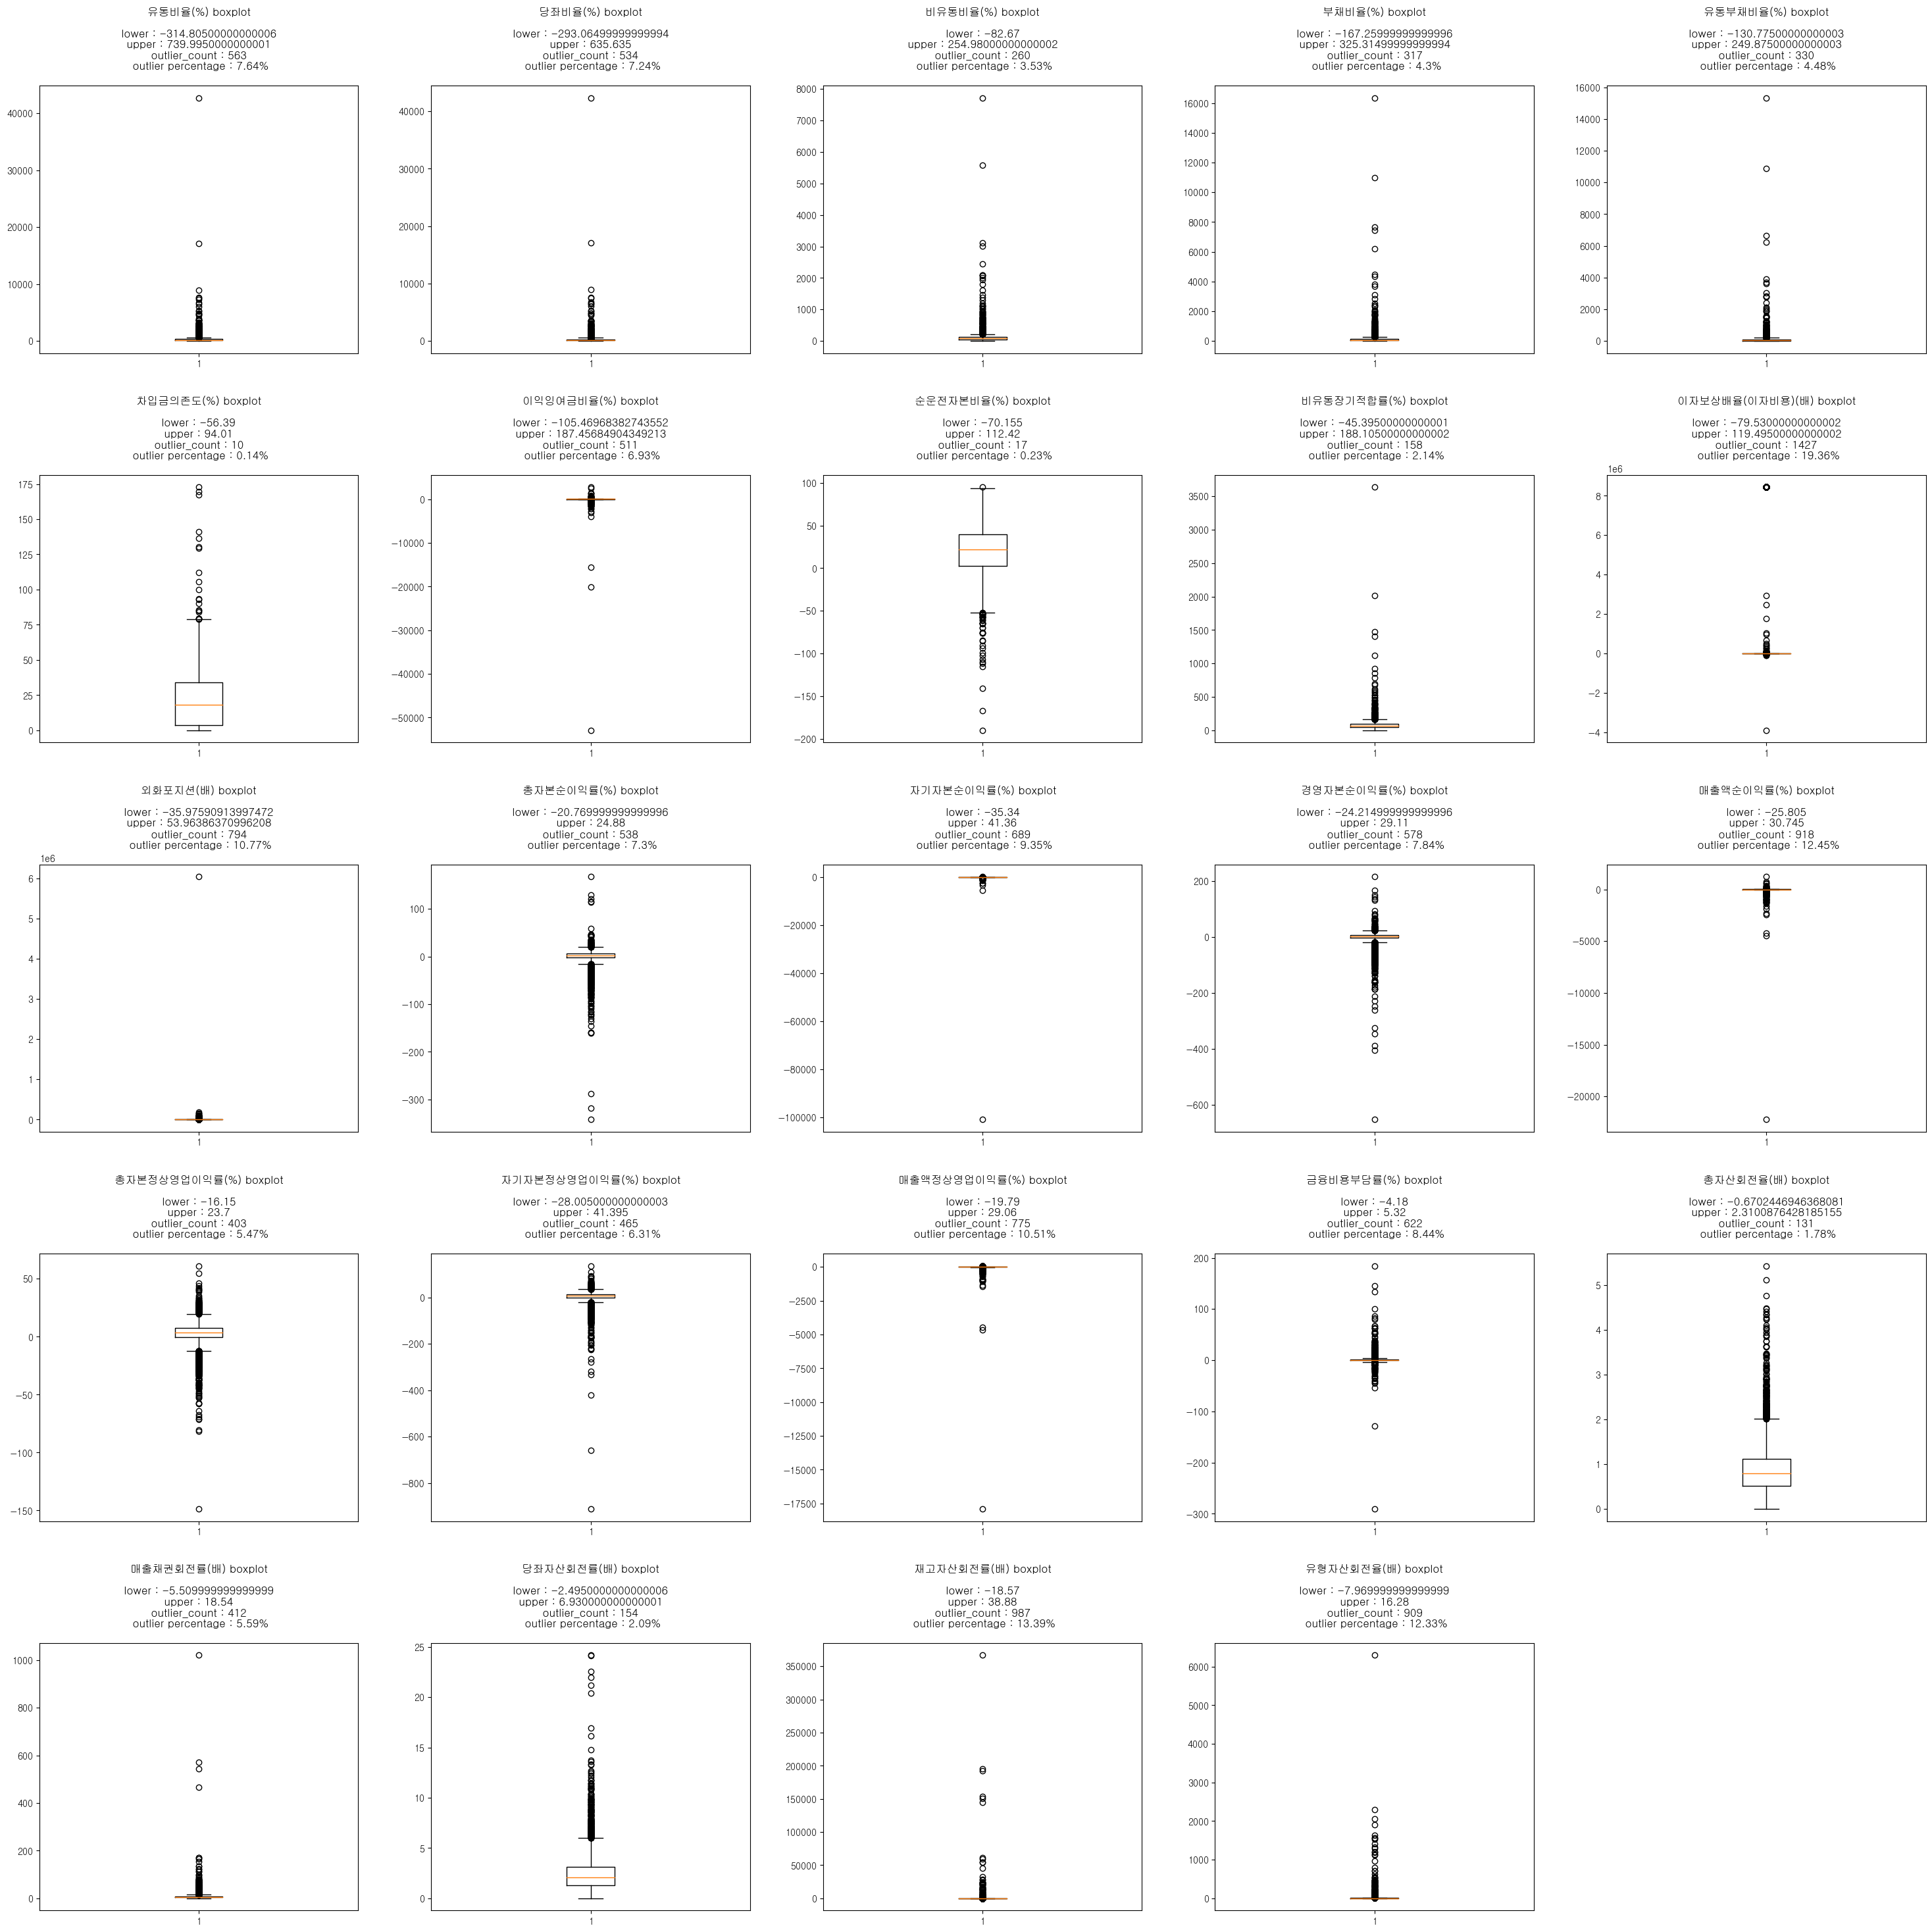

In [205]:
## 이상치를 확인하는 함수 호출, 박스플롯 그리기
box_plot_datas = []

for col in box_q_df.columns[:26]:
    data = outliers_iqr(box_q_df, col)
    box_plot_datas.append(data)

plt.figure(figsize=(30,30))

for i in range(1,len(box_q_df.columns)//2+1):
    plt.subplot(5,5,i)
    plt.title(box_plot_datas[i-1][0])
    plt.boxplot(box_plot_datas[i-1][1])

plt.tight_layout(pad=3)
plt.show()

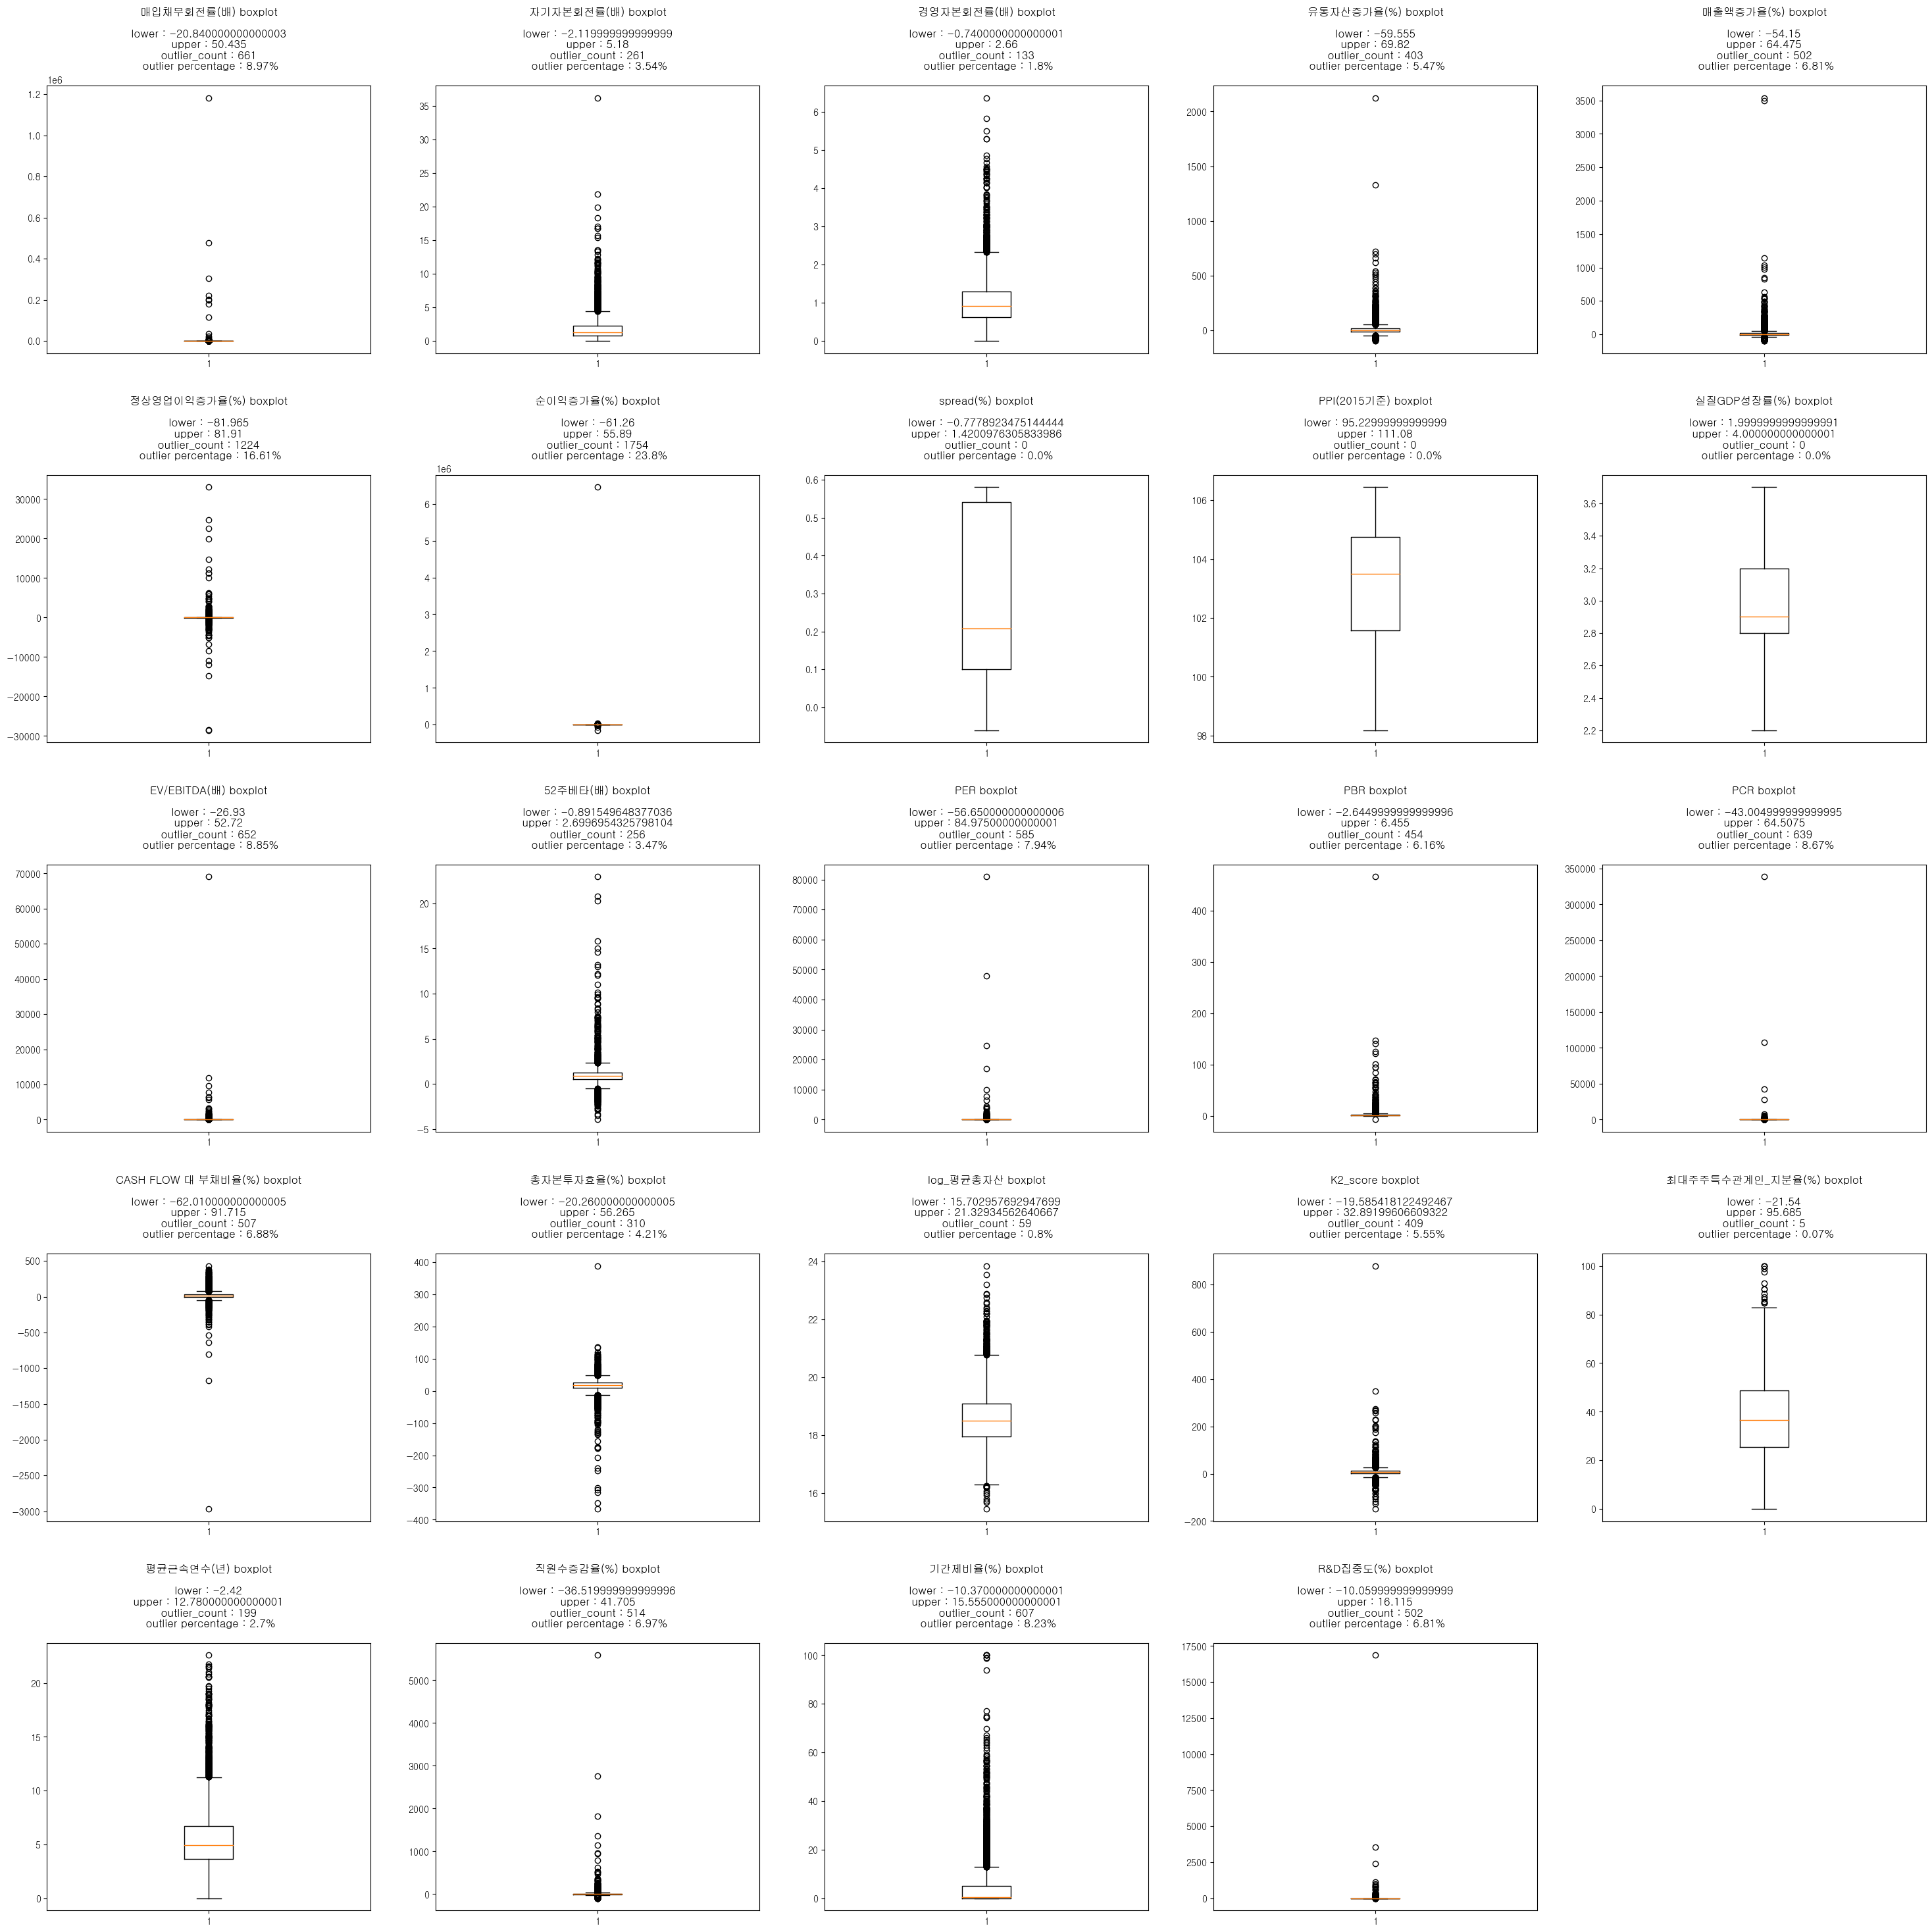

In [206]:
## 이상치를 확인하는 함수 호출, 박스플롯 그리기
box_plot_datas = []

for col in box_q_df.columns[24:]:
    data = outliers_iqr(box_q_df, col)
    box_plot_datas.append(data)

plt.figure(figsize=(30,30))

for i in range(1,len(box_q_df.columns)//2+1):
    plt.subplot(5,5,i)
    plt.title(box_plot_datas[i-1][0])
    plt.boxplot(box_plot_datas[i-1][1])

plt.tight_layout(pad=3)
plt.show()

# QQ plot


In [207]:
def draw_qq(box_q_df):
    num_cols = len(box_q_df.columns)
    num_rows = (num_cols + 1) // 7  # 컬럼 개수에 따라 subplot 행 개수 계산

    fig, axes = plt.subplots(num_rows, 7, figsize=(30, 30))

    # 반복문으로 모든 컬럼의 QQ plot 그리기
    for i, col in enumerate(box_q_df.columns):
        row_idx = i // 7
        col_idx = i % 7
        ax = axes[row_idx, col_idx]
        stats.probplot(box_q_df[col], plot=ax)
        ax.set_title(f'QQ plot of {col}')

    # 남은 비어있는 subplot 제거
    if num_cols % 7 != 0:
        fig.delaxes(axes.flatten()[-1])
    
    plt.tight_layout()
    plt.show()

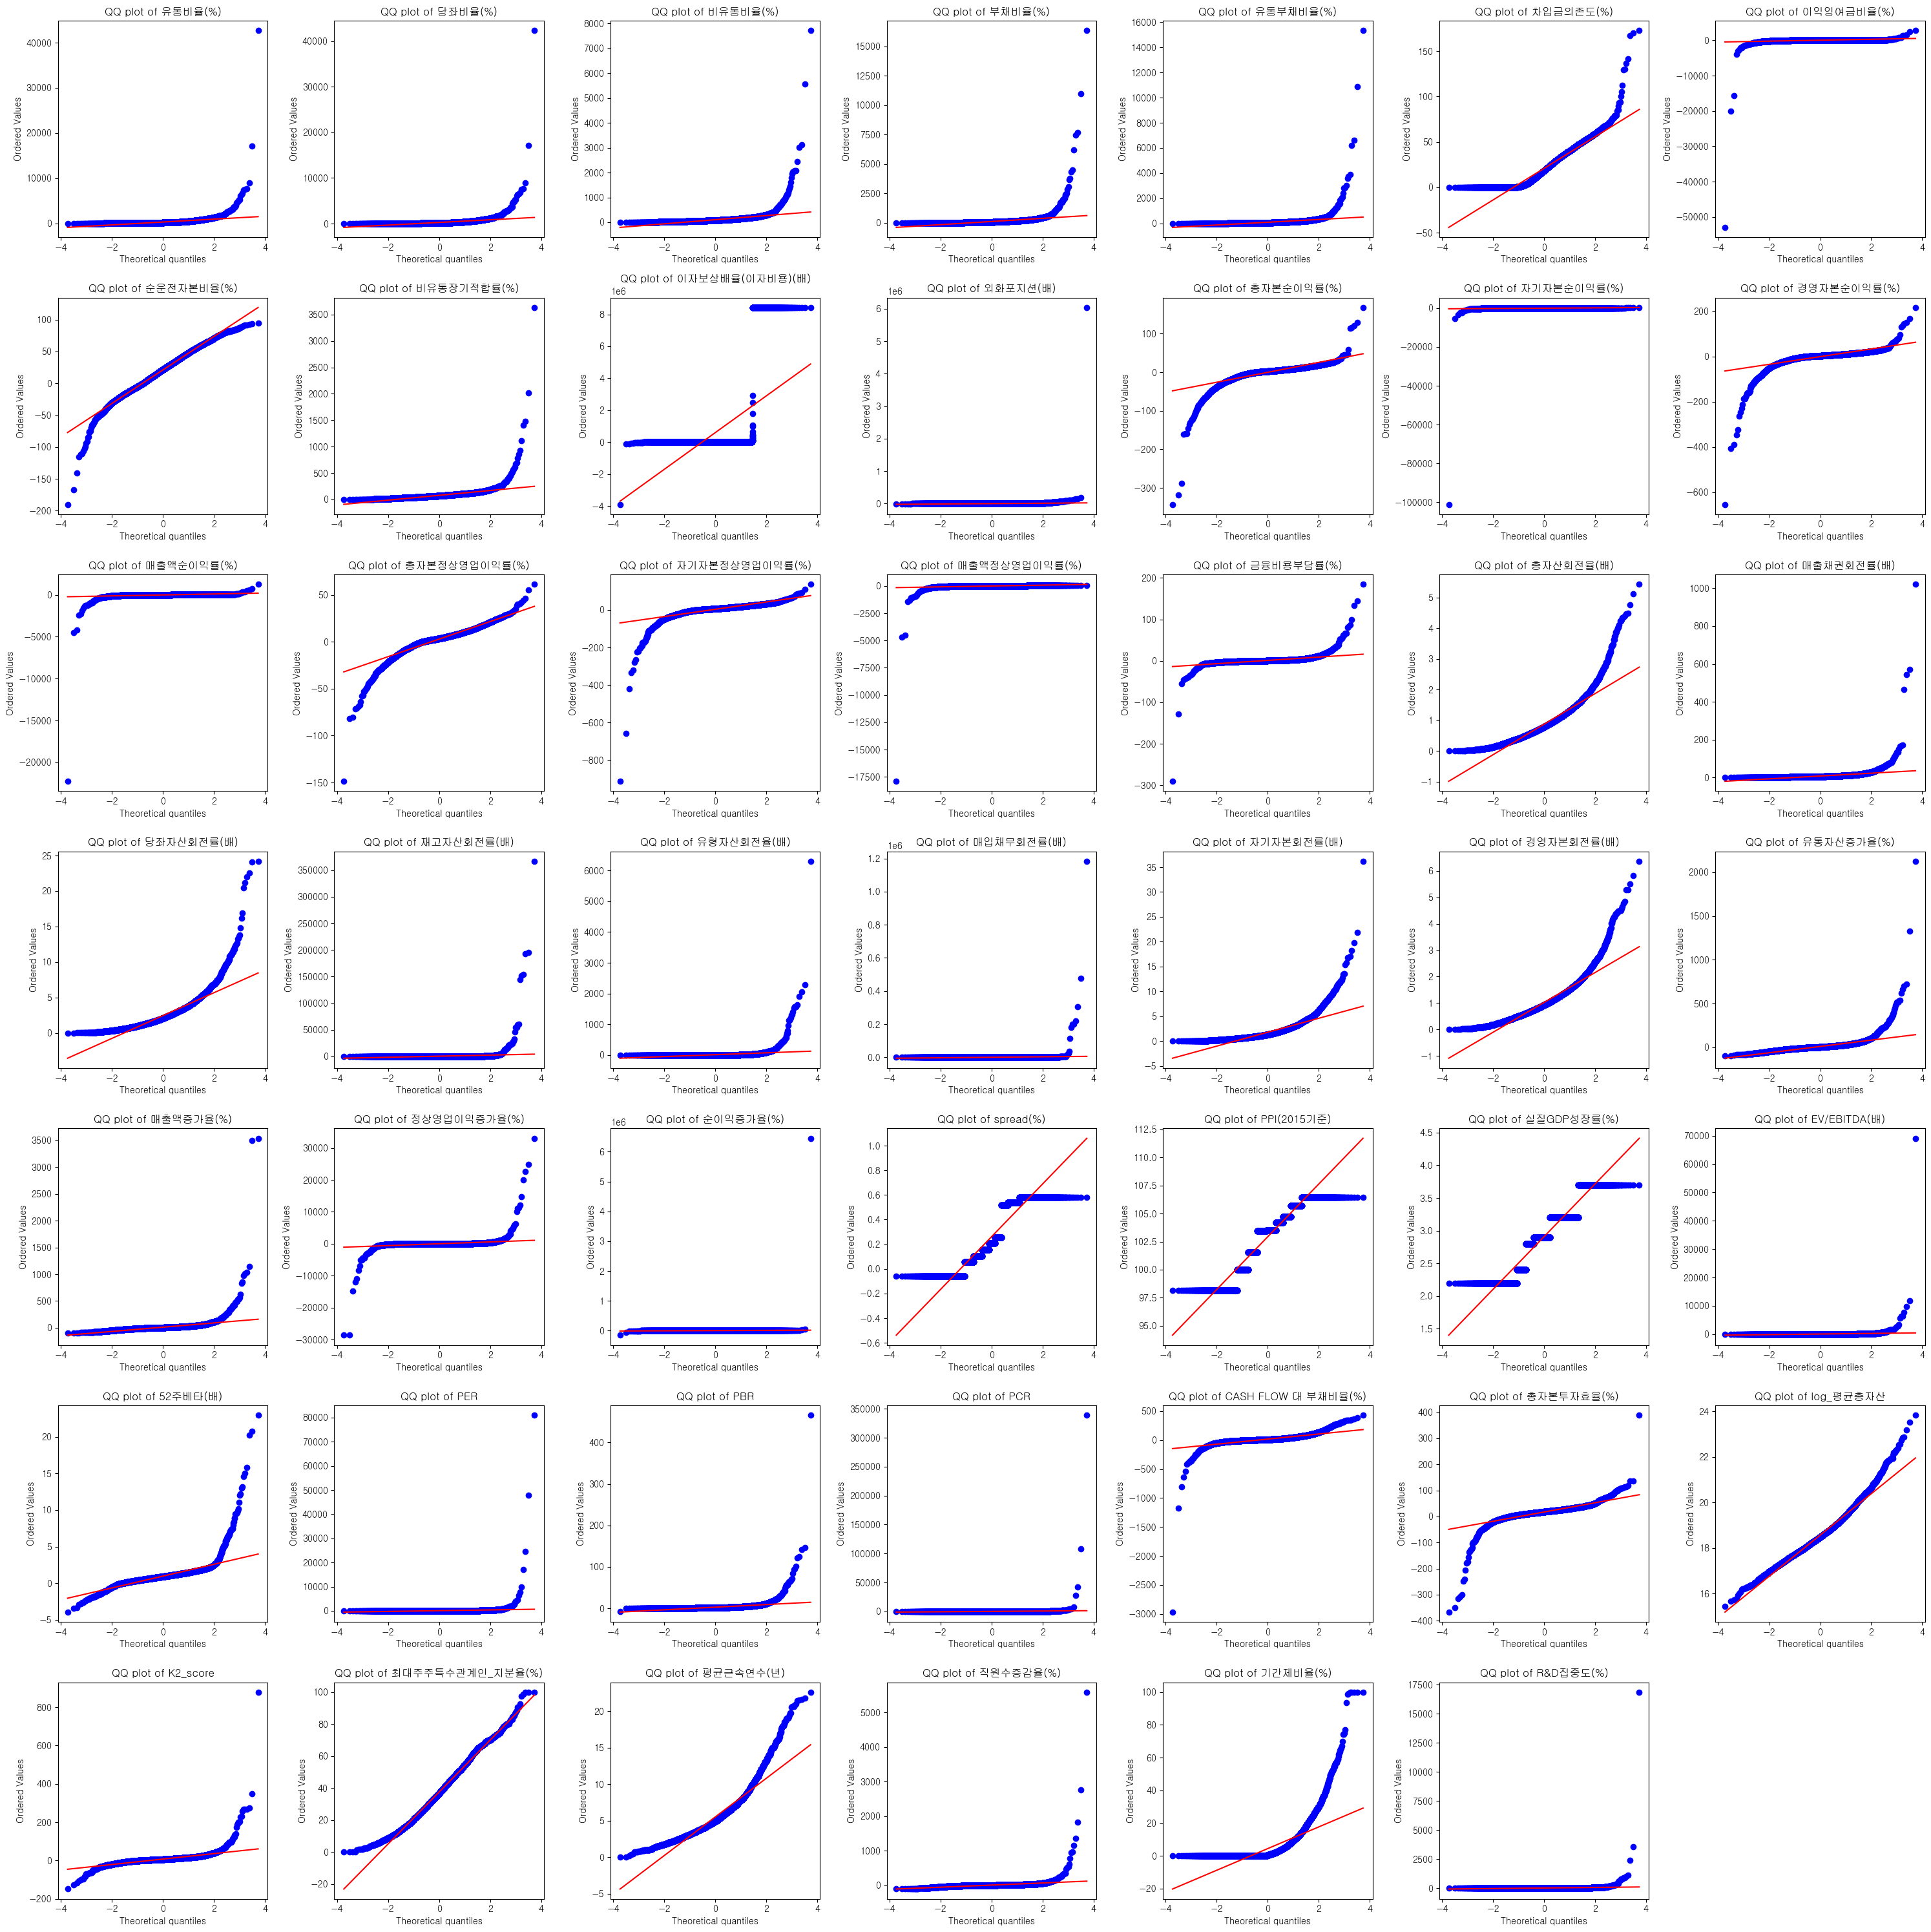

In [208]:
draw_qq(box_q_df)

# 이상치 처리 winsor or 제거

In [209]:
box_q_df_copy = box_q_df.copy()
# box_q_df = box_q_df_copy.copy( )

In [210]:
box_q_df_copy.columns

Index(['유동비율(%)', '당좌비율(%)', '비유동비율(%)', '부채비율(%)', '유동부채비율(%)', '차입금의존도(%)',
       '이익잉여금비율(%)', '순운전자본비율(%)', '비유동장기적합률(%)', '이자보상배율(이자비용)(배)',
       '외화포지션(배)', '총자본순이익률(%)', '자기자본순이익률(%)', '경영자본순이익률(%)', '매출액순이익률(%)',
       '총자본정상영업이익률(%)', '자기자본정상영업이익률(%)', '매출액정상영업이익률(%)', '금융비용부담률(%)',
       '총자산회전율(배)', '매출채권회전률(배)', '당좌자산회전률(배)', '재고자산회전률(배)', '유형자산회전율(배)',
       '매입채무회전률(배)', '자기자본회전률(배)', '경영자본회전률(배)', '유동자산증가율(%)', '매출액증가율(%)',
       '정상영업이익증가율(%)', '순이익증가율(%)', 'spread(%)', 'PPI(2015기준)', '실질GDP성장률(%)',
       'EV/EBITDA(배)', '52주베타(배)', 'PER', 'PBR', 'PCR', 'CASH FLOW 대 부채비율(%)',
       '총자본투자효율(%)', 'log_평균총자산', 'K2_score', '최대주주특수관계인_지분율(%)', '평균근속연수(년)',
       '직원수증감율(%)', '기간제비율(%)', 'R&D집중도(%)'],
      dtype='object')

In [211]:
# two_sided_winsor = ['총자본투자효율(%)', '이자보상배율(이자비용)(배)','총자본순이익률(%)','경영자본순이익률(%)','총자본정상영업이익률(%)','금융비용부담률(%)','정상영업이익증가율(%)']
## 이자보상배율 -> 양단 윈저 제외
two_sided_winsor = ['총자본투자효율(%)','총자본순이익률(%)','경영자본순이익률(%)','총자본정상영업이익률(%)','금융비용부담률(%)','정상영업이익증가율(%)']

one_sided_winsor_upper = ['유동비율(%)', '당좌비율(%)', '비유동비율(%)', '부채비율(%)', '유동부채비율(%)', '차입금의존도(%)','비유동장기적합률(%)','외화포지션(배)',\
                                        '총자산회전율(배)', '매출채권회전률(배)', '당좌자산회전률(배)', '재고자산회전률(배)', '유형자산회전율(배)',\
                                        '매입채무회전률(배)', '자기자본회전률(배)', '경영자본회전률(배)','유동자산증가율(%)', '매출액증가율(%)','순이익증가율(%)',\
                                        '평균근속연수(년)','직원수증감율(%)','기간제비율(%)','R&D집중도(%)','EV/EBITDA(배)','52주베타(배)','PER', 'PBR', 'PCR','log_평균총자산','K2_score']

one_sided_winsor_lower = ['이익잉여금비율(%)', '순운전자본비율(%)','자기자본순이익률(%)','매출액순이익률(%)','자기자본정상영업이익률(%)','매출액정상영업이익률(%)',\
                                        'CASH FLOW 대 부채비율(%)',]

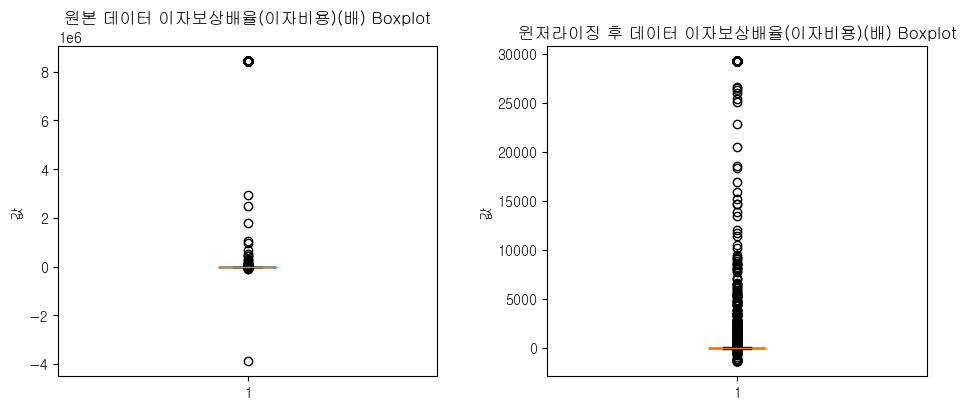

In [212]:
plt.figure(figsize=(10, 40))

# 상위 1%와 하위 1%의 값을 구합니다.
upper_cutoff = np.percentile(box_q_df['이자보상배율(이자비용)(배)'], 92.4)
lower_cutoff = np.percentile(box_q_df['이자보상배율(이자비용)(배)'], 0.5)

# 윈저라이징 적용
box_q_df_copy['이자보상배율(이자비용)(배)'] = np.clip(box_q_df['이자보상배율(이자비용)(배)'], lower_cutoff, upper_cutoff)

plt.subplot(10, 2, 1)
plt.boxplot(box_q_df['이자보상배율(이자비용)(배)'])
plt.title(f'원본 데이터 이자보상배율(이자비용)(배) Boxplot')
plt.ylabel('값')

# 윈저라이징 후 데이터의 boxplot
plt.subplot(10, 2, 2)
plt.boxplot(box_q_df_copy['이자보상배율(이자비용)(배)'])
plt.title(f'윈저라이징 후 데이터 이자보상배율(이자비용)(배) Boxplot')
plt.ylabel('값')

plt.tight_layout(pad=3)
plt.show()

In [213]:
box_q_df_copy["순이익증가율(%)"].nlargest(len(box_q_df_copy))

7567     6452079.09
5713       39109.21
14140      19876.56
12146      11884.16
1824       10059.21
            ...    
8514       -8622.29
11034      -8718.92
8887      -13831.48
5864      -67173.57
877      -152207.88
Name: 순이익증가율(%), Length: 7371, dtype: float64

In [214]:
# 한 번 바꾸면 min값 바뀌므로 두 번 수행
box_q_df_copy.loc[box_q_df_copy["순이익증가율(%)"] == box_q_df_copy["순이익증가율(%)"].min(),"순이익증가율(%)"] = -8718.92
box_q_df_copy.loc[box_q_df_copy["순이익증가율(%)"] == box_q_df_copy["순이익증가율(%)"].min(),"순이익증가율(%)"] = -8718.92
box_q_df_copy.loc[box_q_df_copy["순이익증가율(%)"] == box_q_df_copy["순이익증가율(%)"].min(),"순이익증가율(%)"] = -8718.92

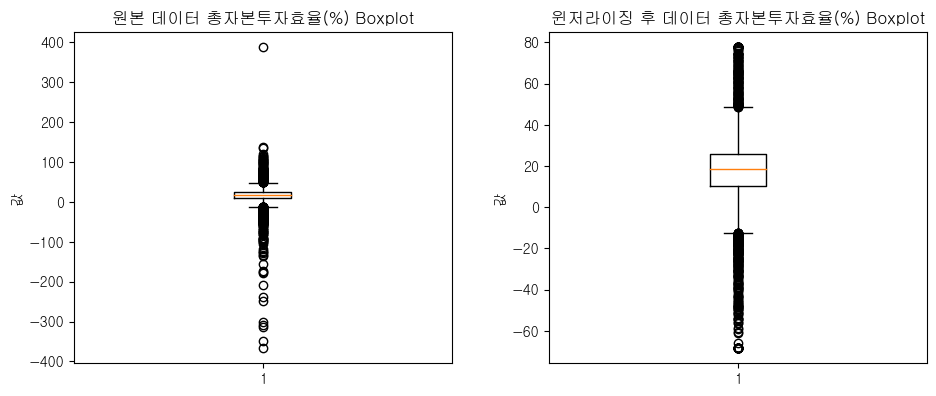

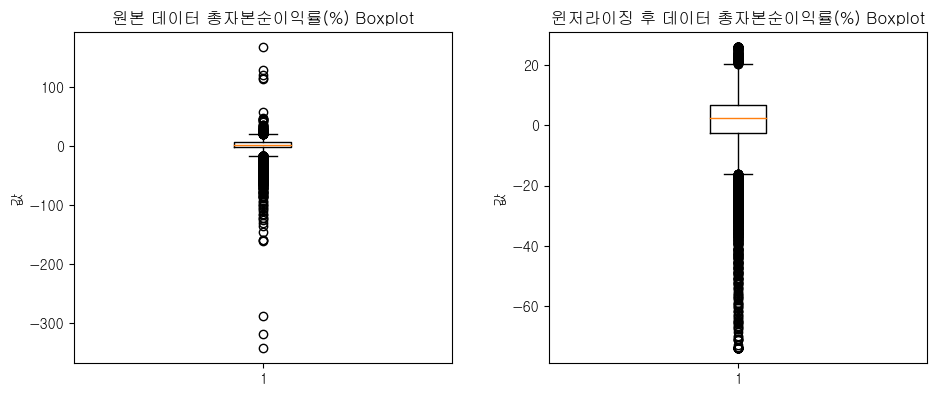

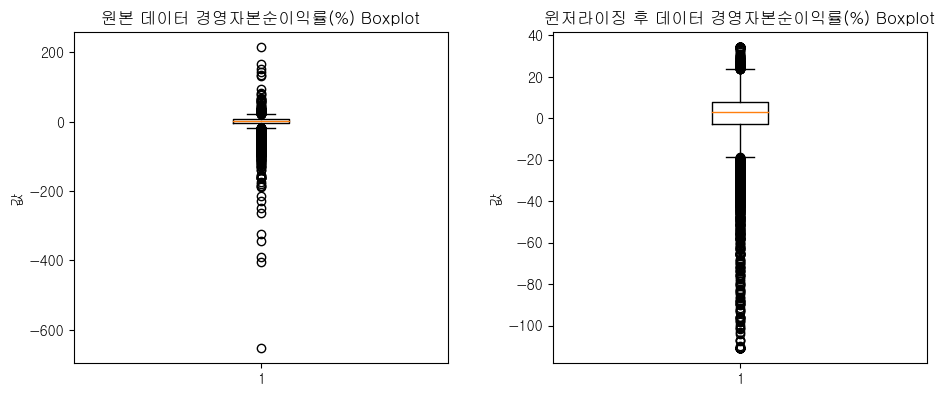

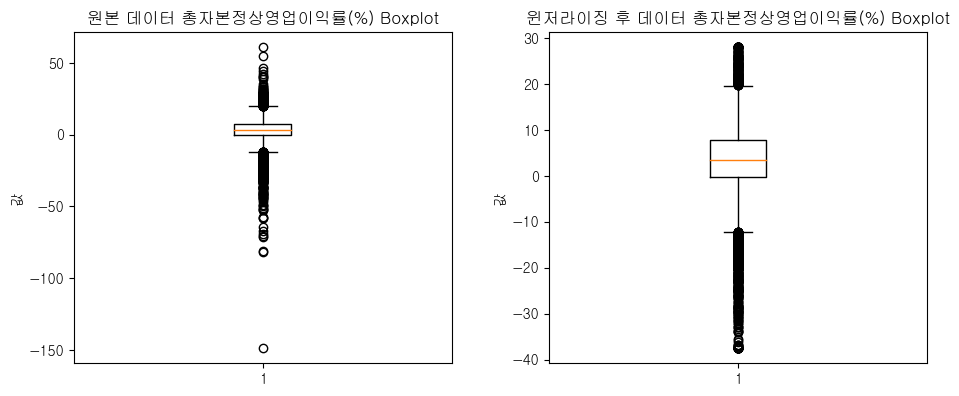

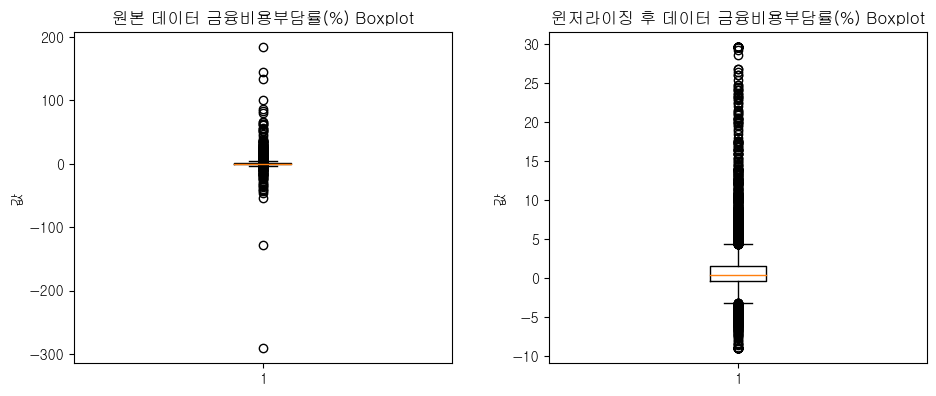

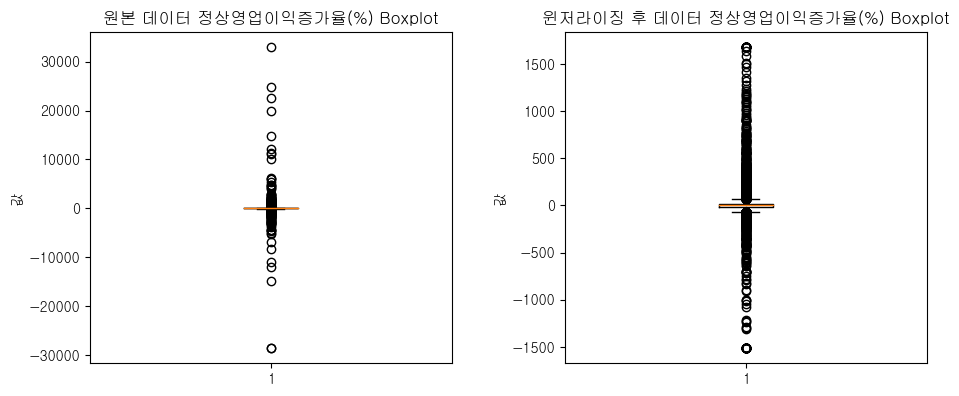

In [215]:
# i ) winsorizing 1% -> 양단

# 원본 데이터의 boxplot
for col in two_sided_winsor:
    # boxplot 비교를 위한 subplot 생성
    plt.figure(figsize=(10, 40))

    # 상위 1%와 하위 1%의 값을 구합니다.
    upper_cutoff = np.percentile(box_q_df_copy[col], 99.5)
    lower_cutoff = np.percentile(box_q_df_copy[col], 0.5)

    # 윈저라이징 적용
    box_q_df_copy[col] = np.clip(box_q_df_copy[col], lower_cutoff, upper_cutoff)

    plt.subplot(10, 2, 1)
    plt.boxplot(box_q_df[col])
    plt.title(f'원본 데이터 {col} Boxplot')
    plt.ylabel('값')

    # 윈저라이징 후 데이터의 boxplot
    plt.subplot(10, 2, 2)
    plt.boxplot(box_q_df_copy[col])
    plt.title(f'윈저라이징 후 데이터 {col} Boxplot')
    plt.ylabel('값')

    plt.tight_layout(pad=3)
    plt.show()

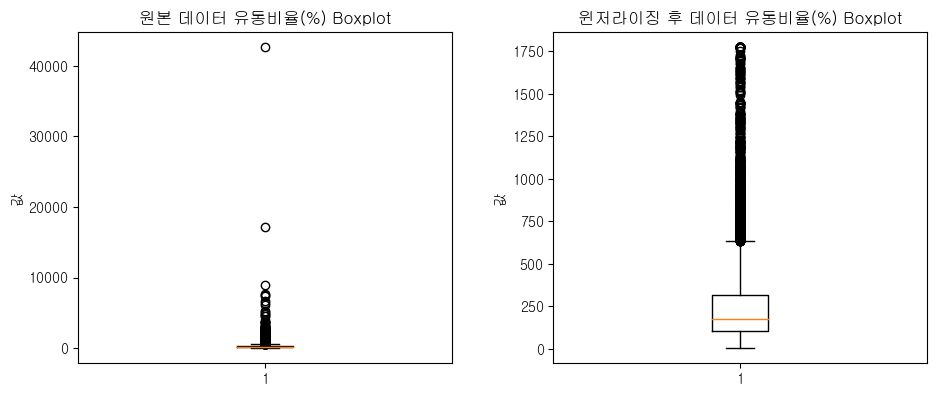

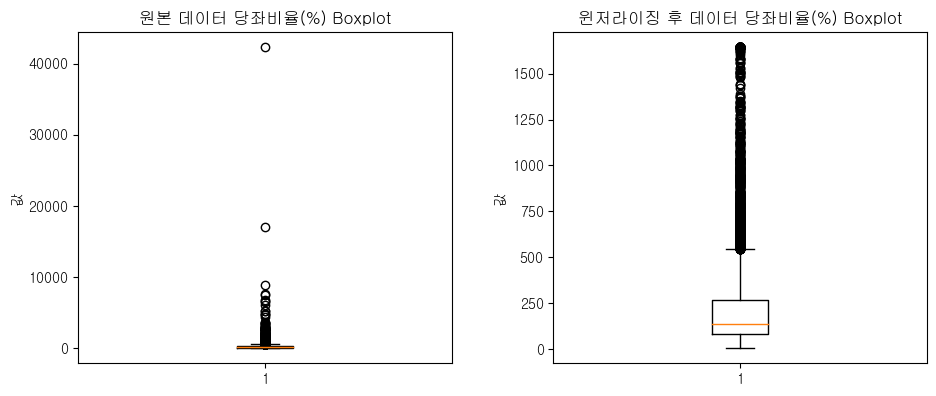

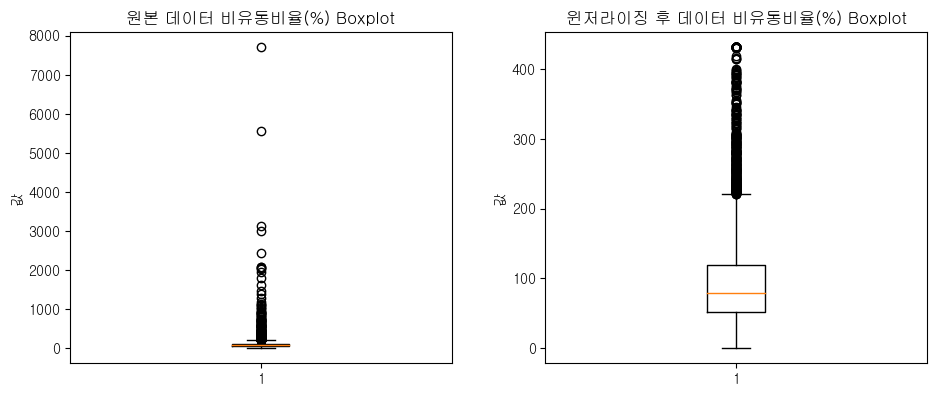

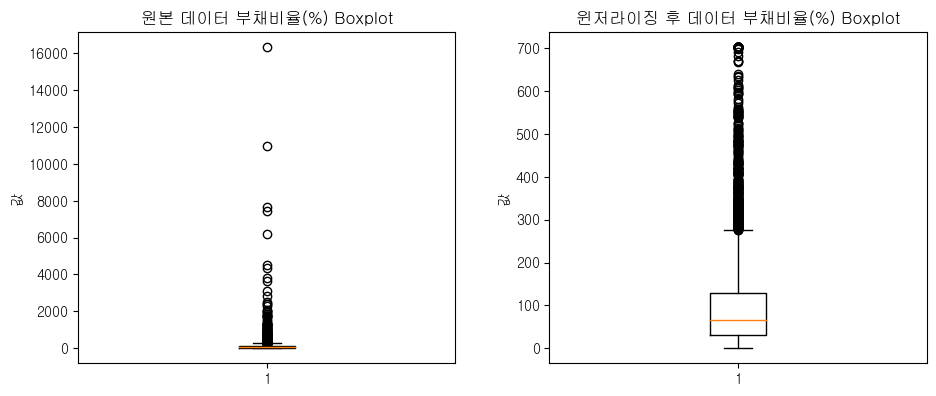

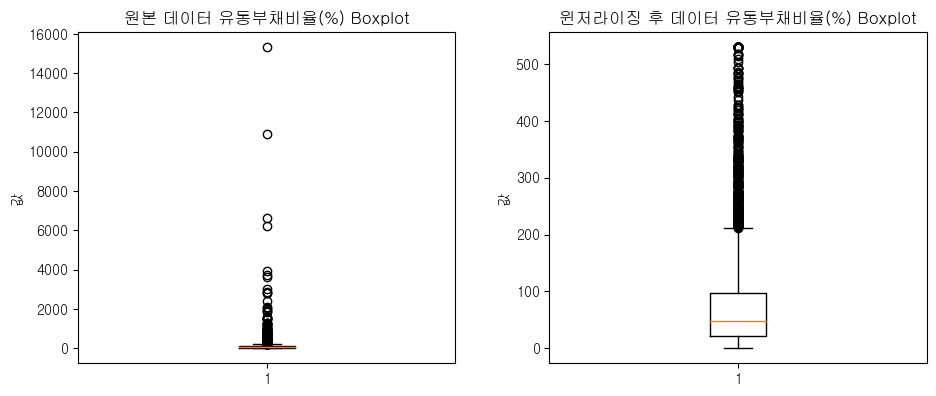

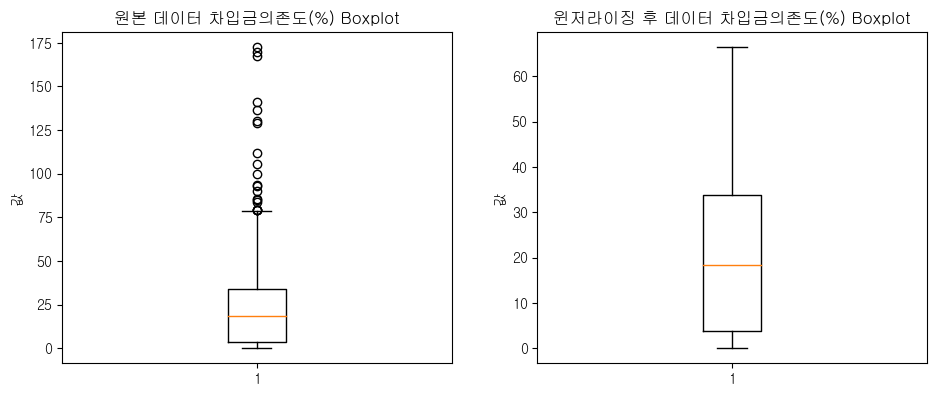

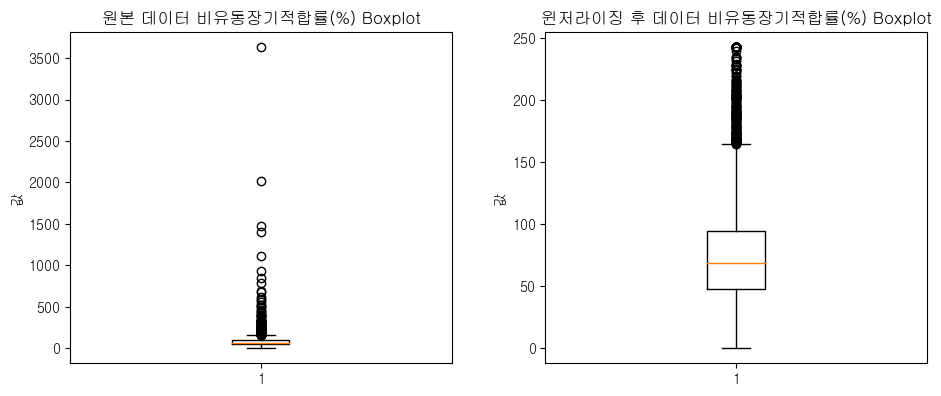

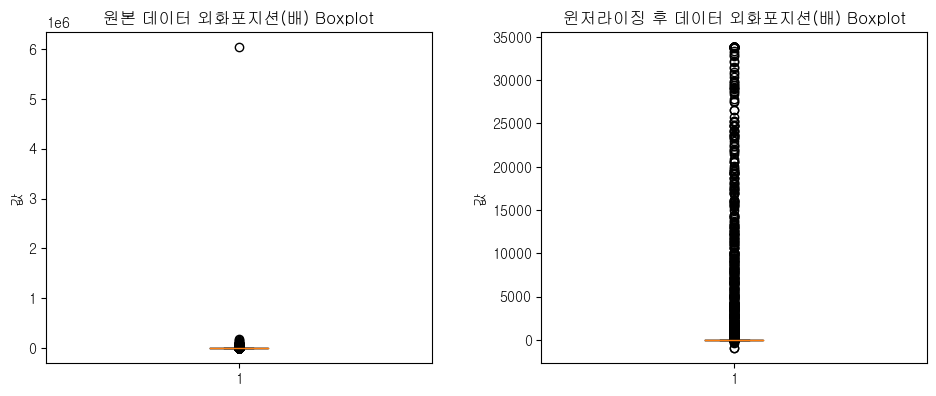

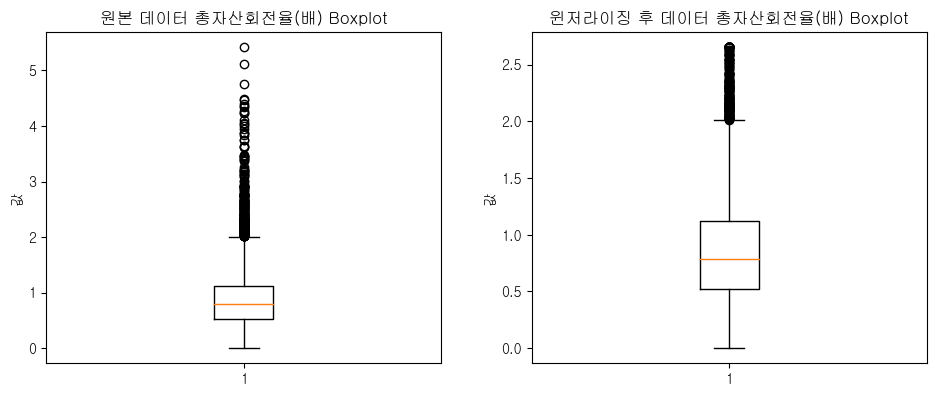

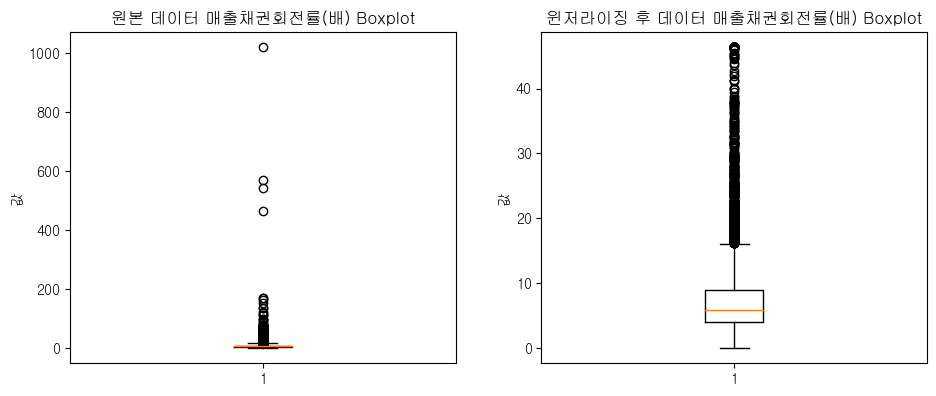

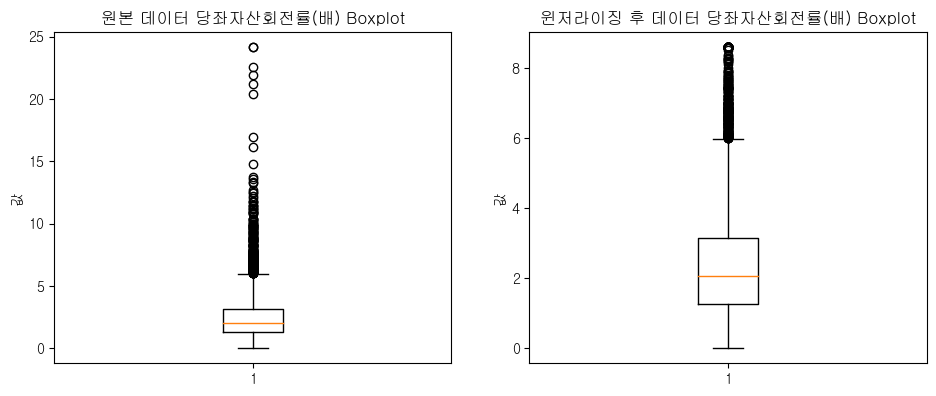

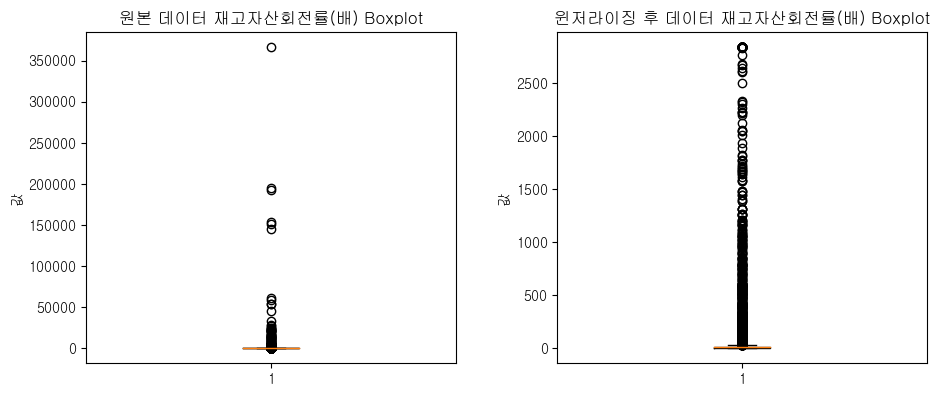

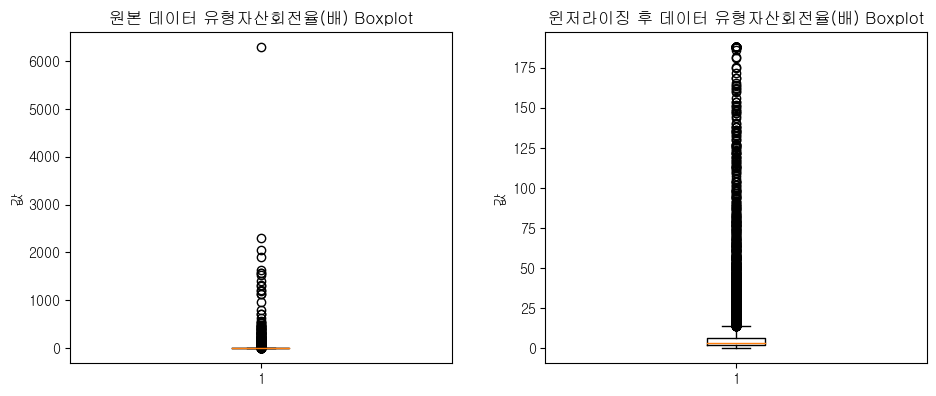

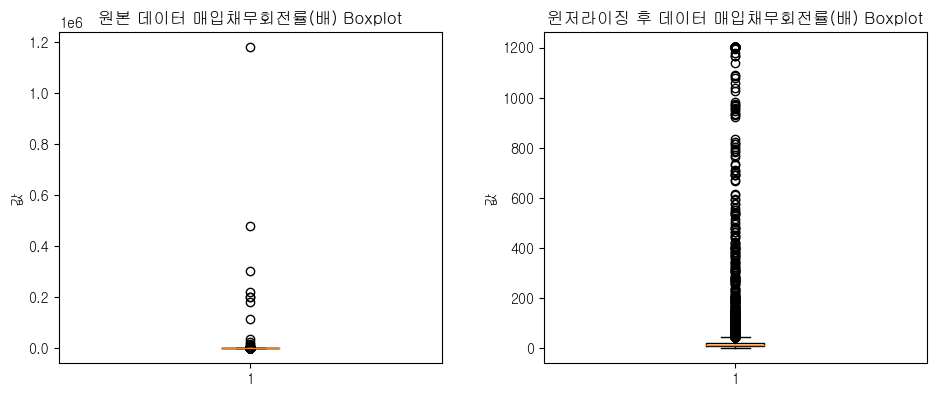

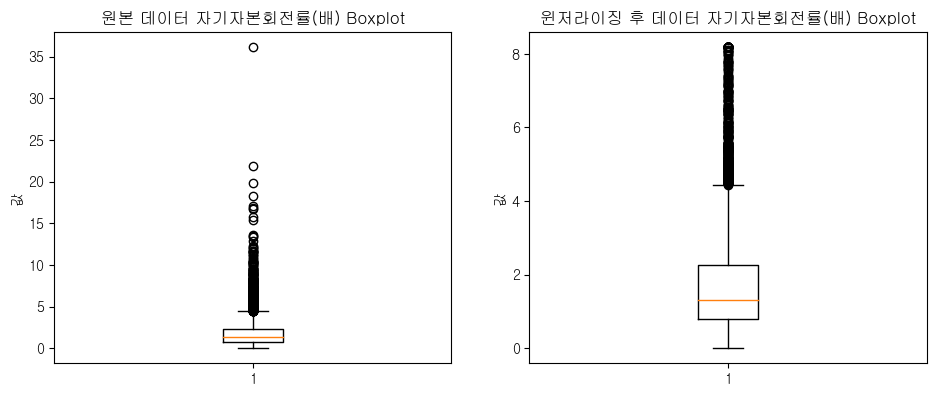

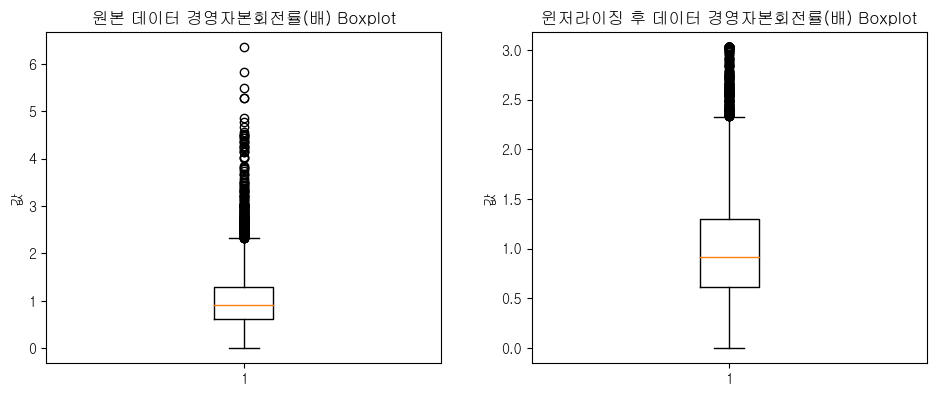

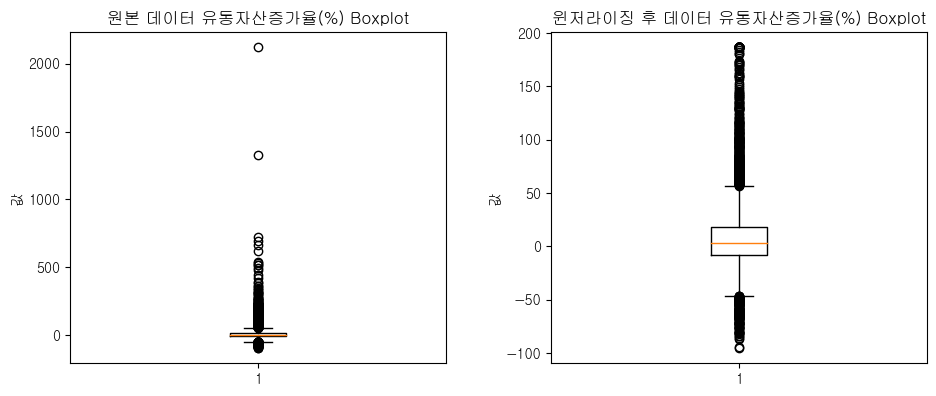

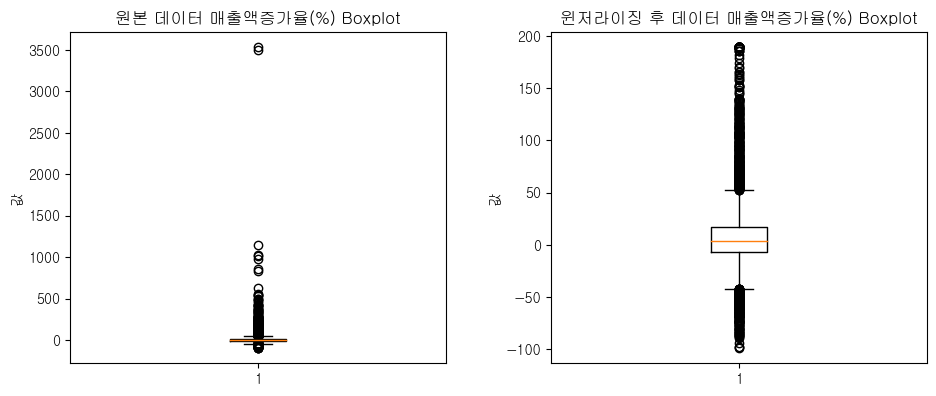

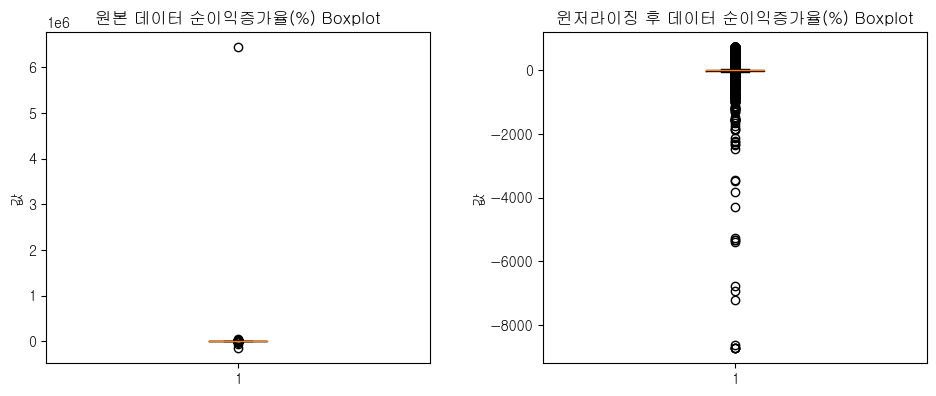

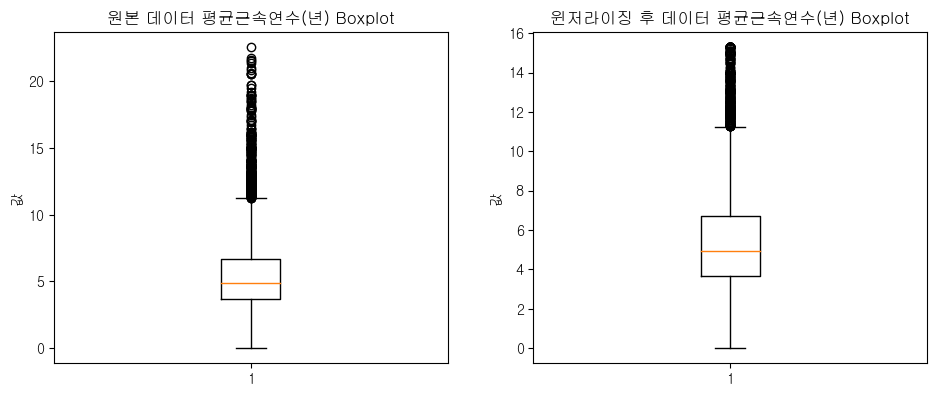

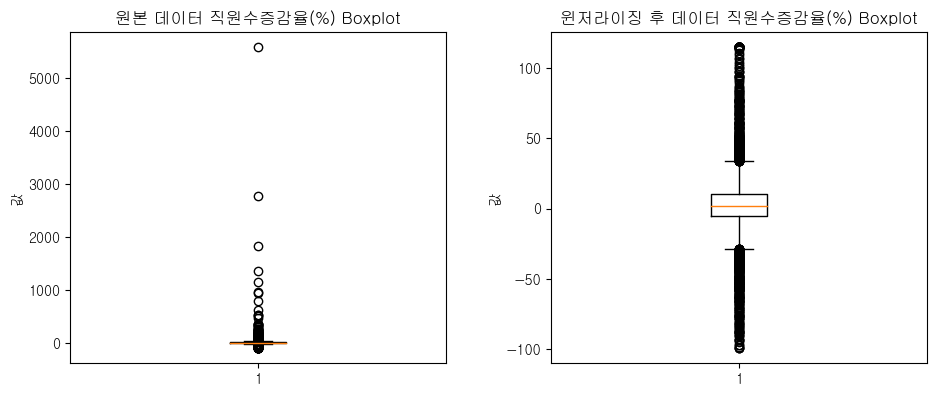

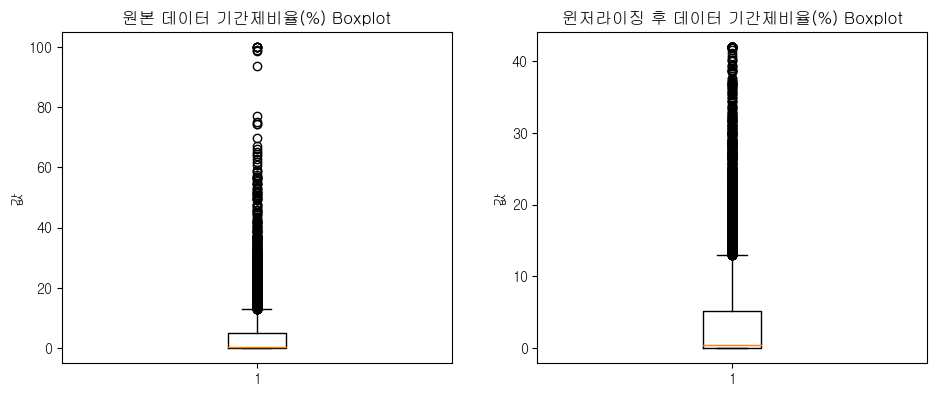

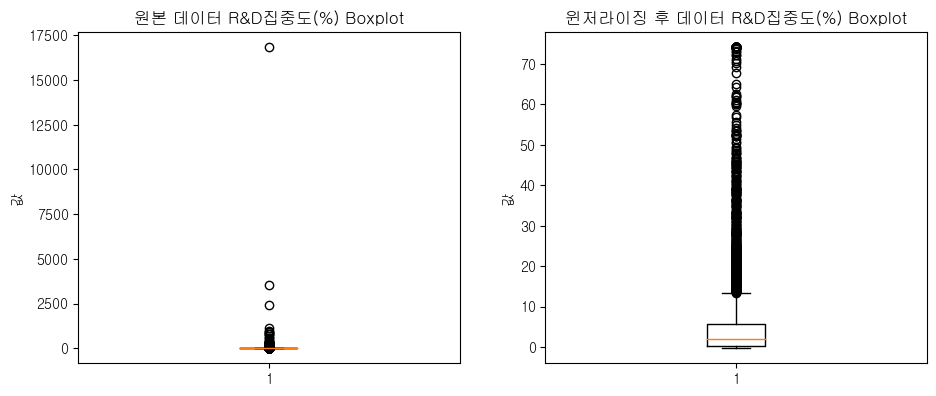

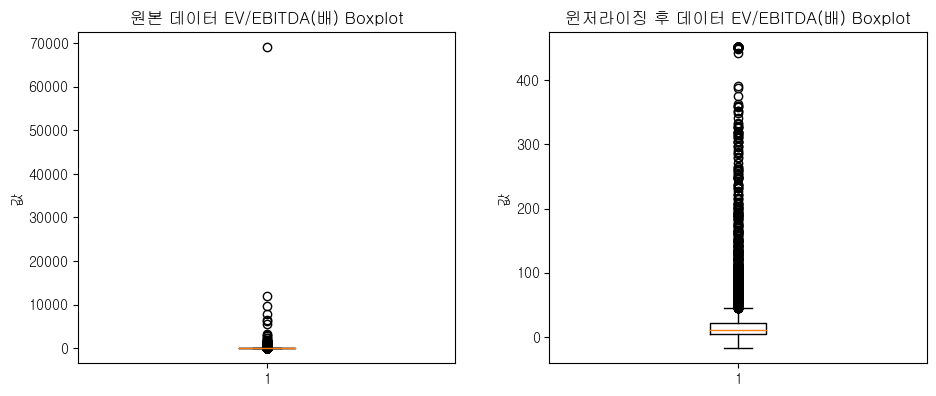

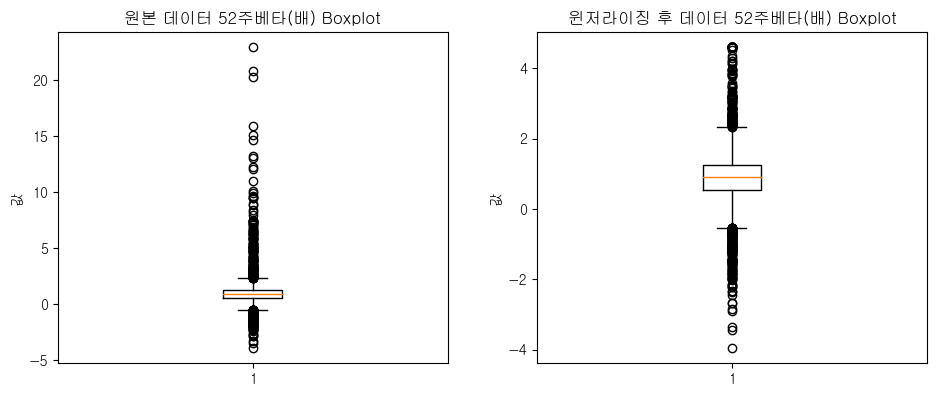

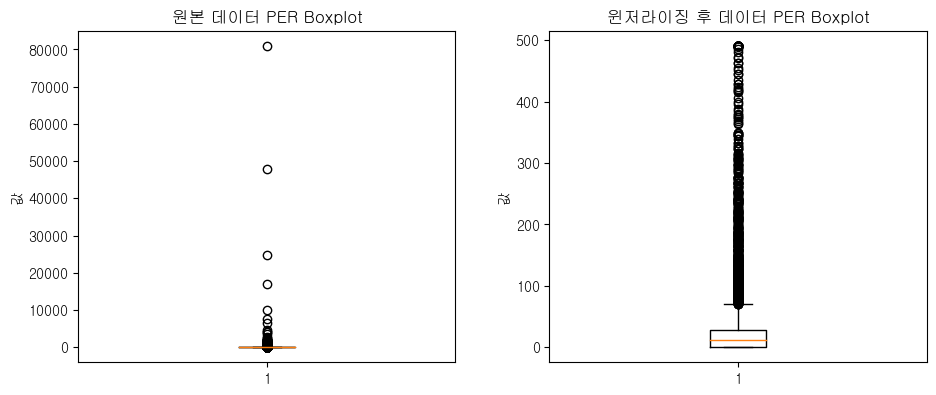

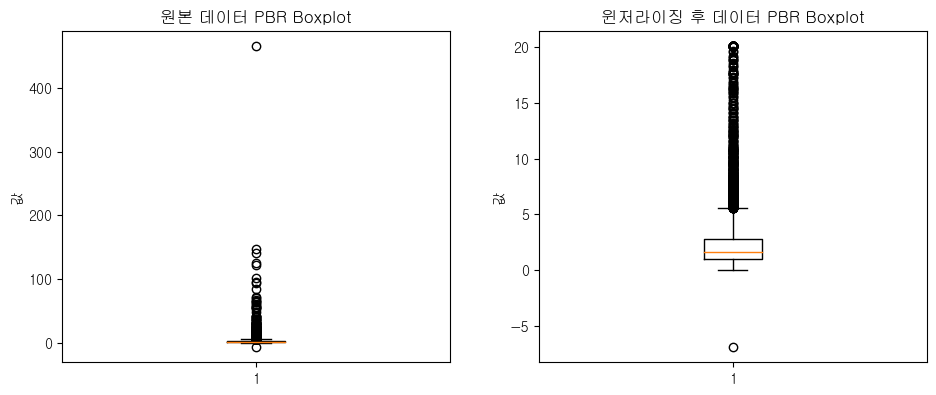

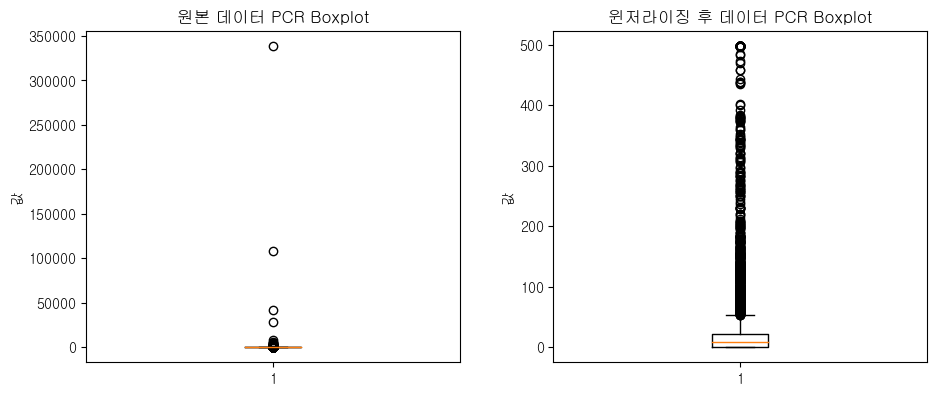

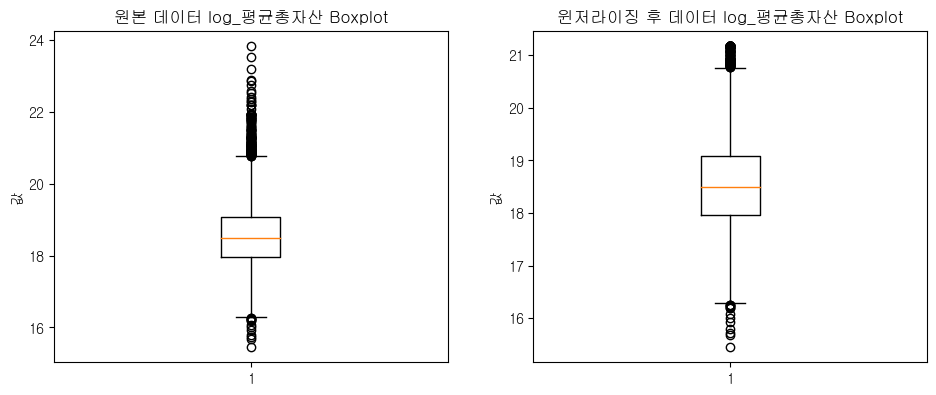

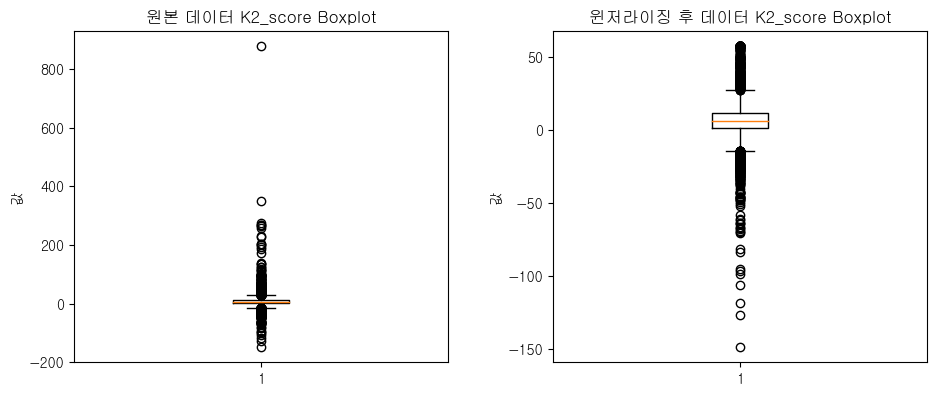

In [216]:
# i ) winsorizing 1%_상단 

# 원본 데이터의 boxplot
for col in one_sided_winsor_upper:
    # boxplot 비교를 위한 subplot 생성
    plt.figure(figsize=(10, 40))

    ## 양단 윈저라이징
    # 상위 1%와 하위 1%의 값을 구합니다.
    # upper_cutoff = np.percentile(box_q_df[col], 99.5)
    # lower_cutoff = np.percentile(box_q_df[col], 0.5)

    # 윈저라이징 적용
    # data_winsorized = np.clip(box_q_df[col], lower_cutoff, upper_cutoff)

    ## 한 쪽만 윈저라이징
    percentile_99 = np.percentile(box_q_df_copy[col], 99)

    box_q_df_copy[col] = np.where(box_q_df_copy[col] > percentile_99, percentile_99, box_q_df_copy[col])

    plt.subplot(10, 2, 1)
    plt.boxplot(box_q_df[col])
    plt.title(f'원본 데이터 {col} Boxplot')
    plt.ylabel('값')

    # 윈저라이징 후 데이터의 boxplot
    plt.subplot(10, 2, 2)
    plt.boxplot(box_q_df_copy[col])
    plt.title(f'윈저라이징 후 데이터 {col} Boxplot')
    plt.ylabel('값')

    plt.tight_layout(pad=3)
    plt.show()

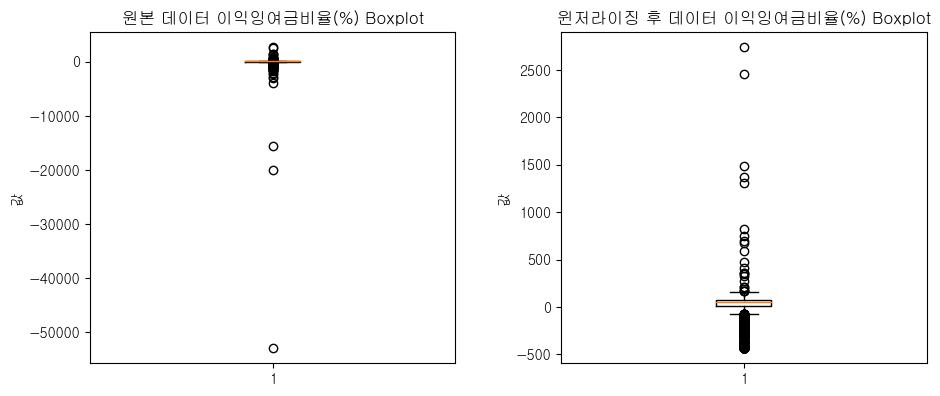

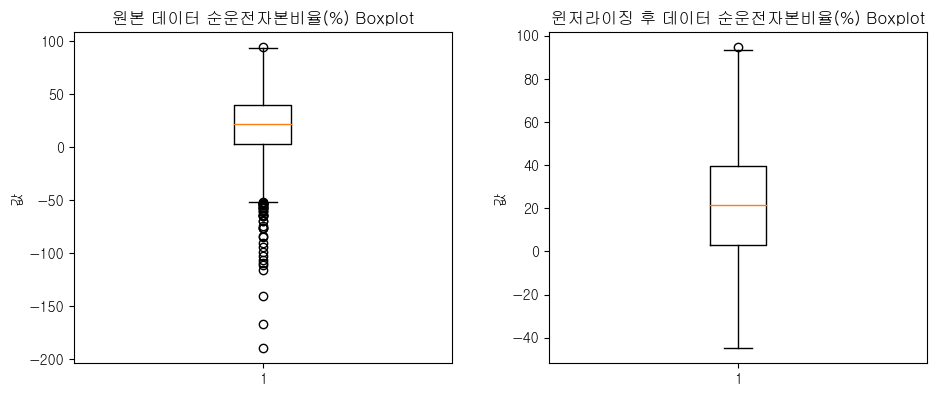

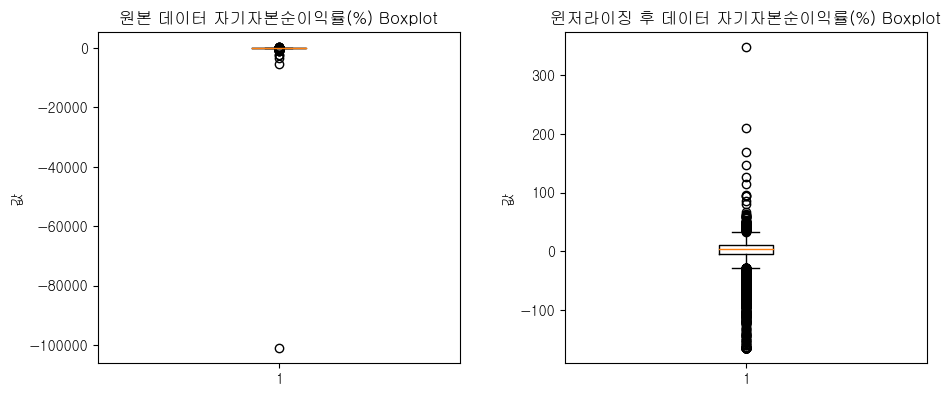

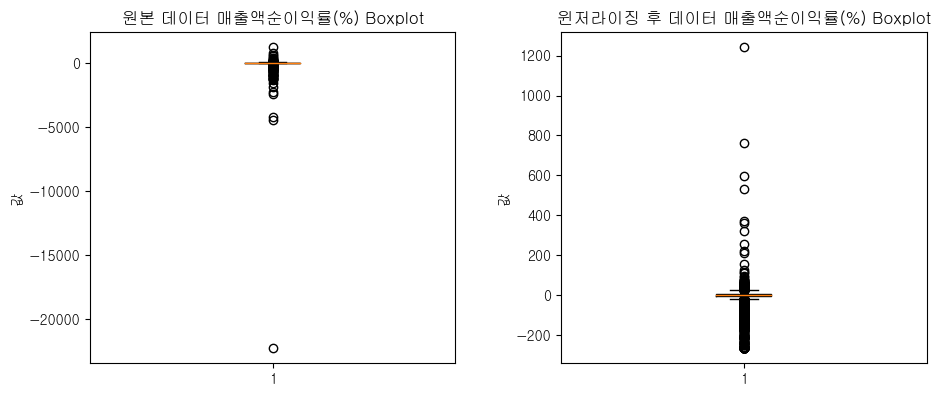

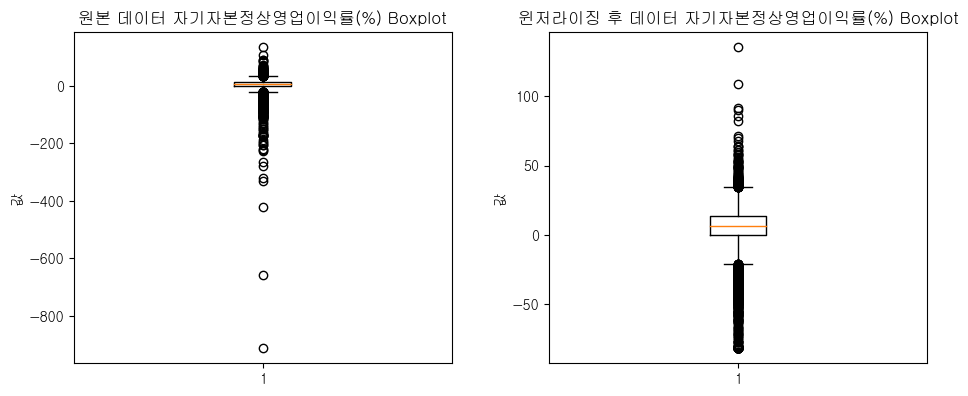

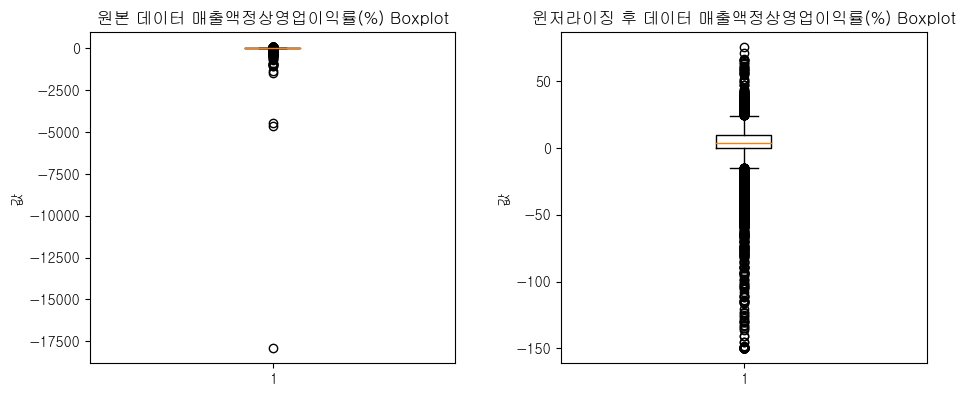

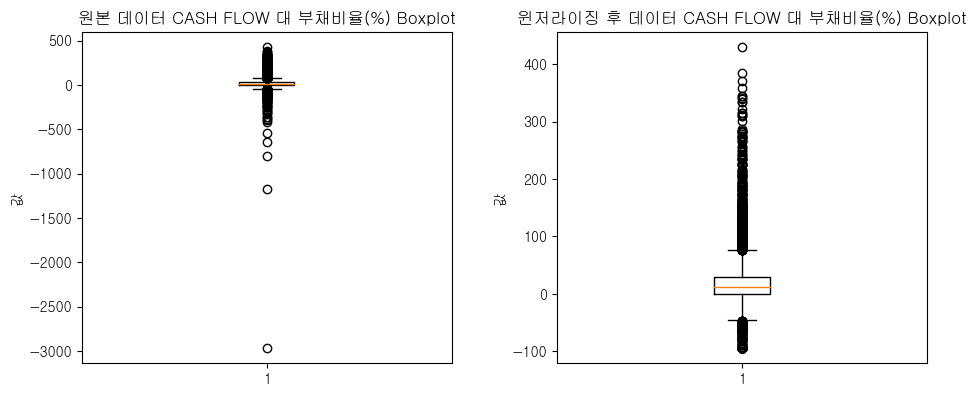

In [217]:
# i ) winsorizing 1%_하단

# 원본 데이터의 boxplot
for col in one_sided_winsor_lower:
    # boxplot 비교를 위한 subplot 생성
    plt.figure(figsize=(10, 40))

    ## 양단 윈저라이징
    # 상위 1%와 하위 1%의 값을 구합니다.
    # upper_cutoff = np.percentile(box_q_df[col], 99.5)
    # lower_cutoff = np.percentile(box_q_df[col], 0.5)

    # 윈저라이징 적용
    # data_winsorized = np.clip(box_q_df[col], lower_cutoff, upper_cutoff)

    ## 한 쪽만 윈저라이징
    percentile_1 = np.percentile(box_q_df_copy[col], 1)

    box_q_df_copy[col] = np.where(box_q_df_copy[col] < percentile_1, percentile_1, box_q_df_copy[col])

    plt.subplot(10, 2, 1)
    plt.boxplot(box_q_df[col])
    plt.title(f'원본 데이터 {col} Boxplot')
    plt.ylabel('값')

    # 윈저라이징 후 데이터의 boxplot
    plt.subplot(10, 2, 2)
    plt.boxplot(box_q_df_copy[col])
    plt.title(f'윈저라이징 후 데이터 {col} Boxplot')
    plt.ylabel('값')

    plt.tight_layout(pad=3)
    plt.show()

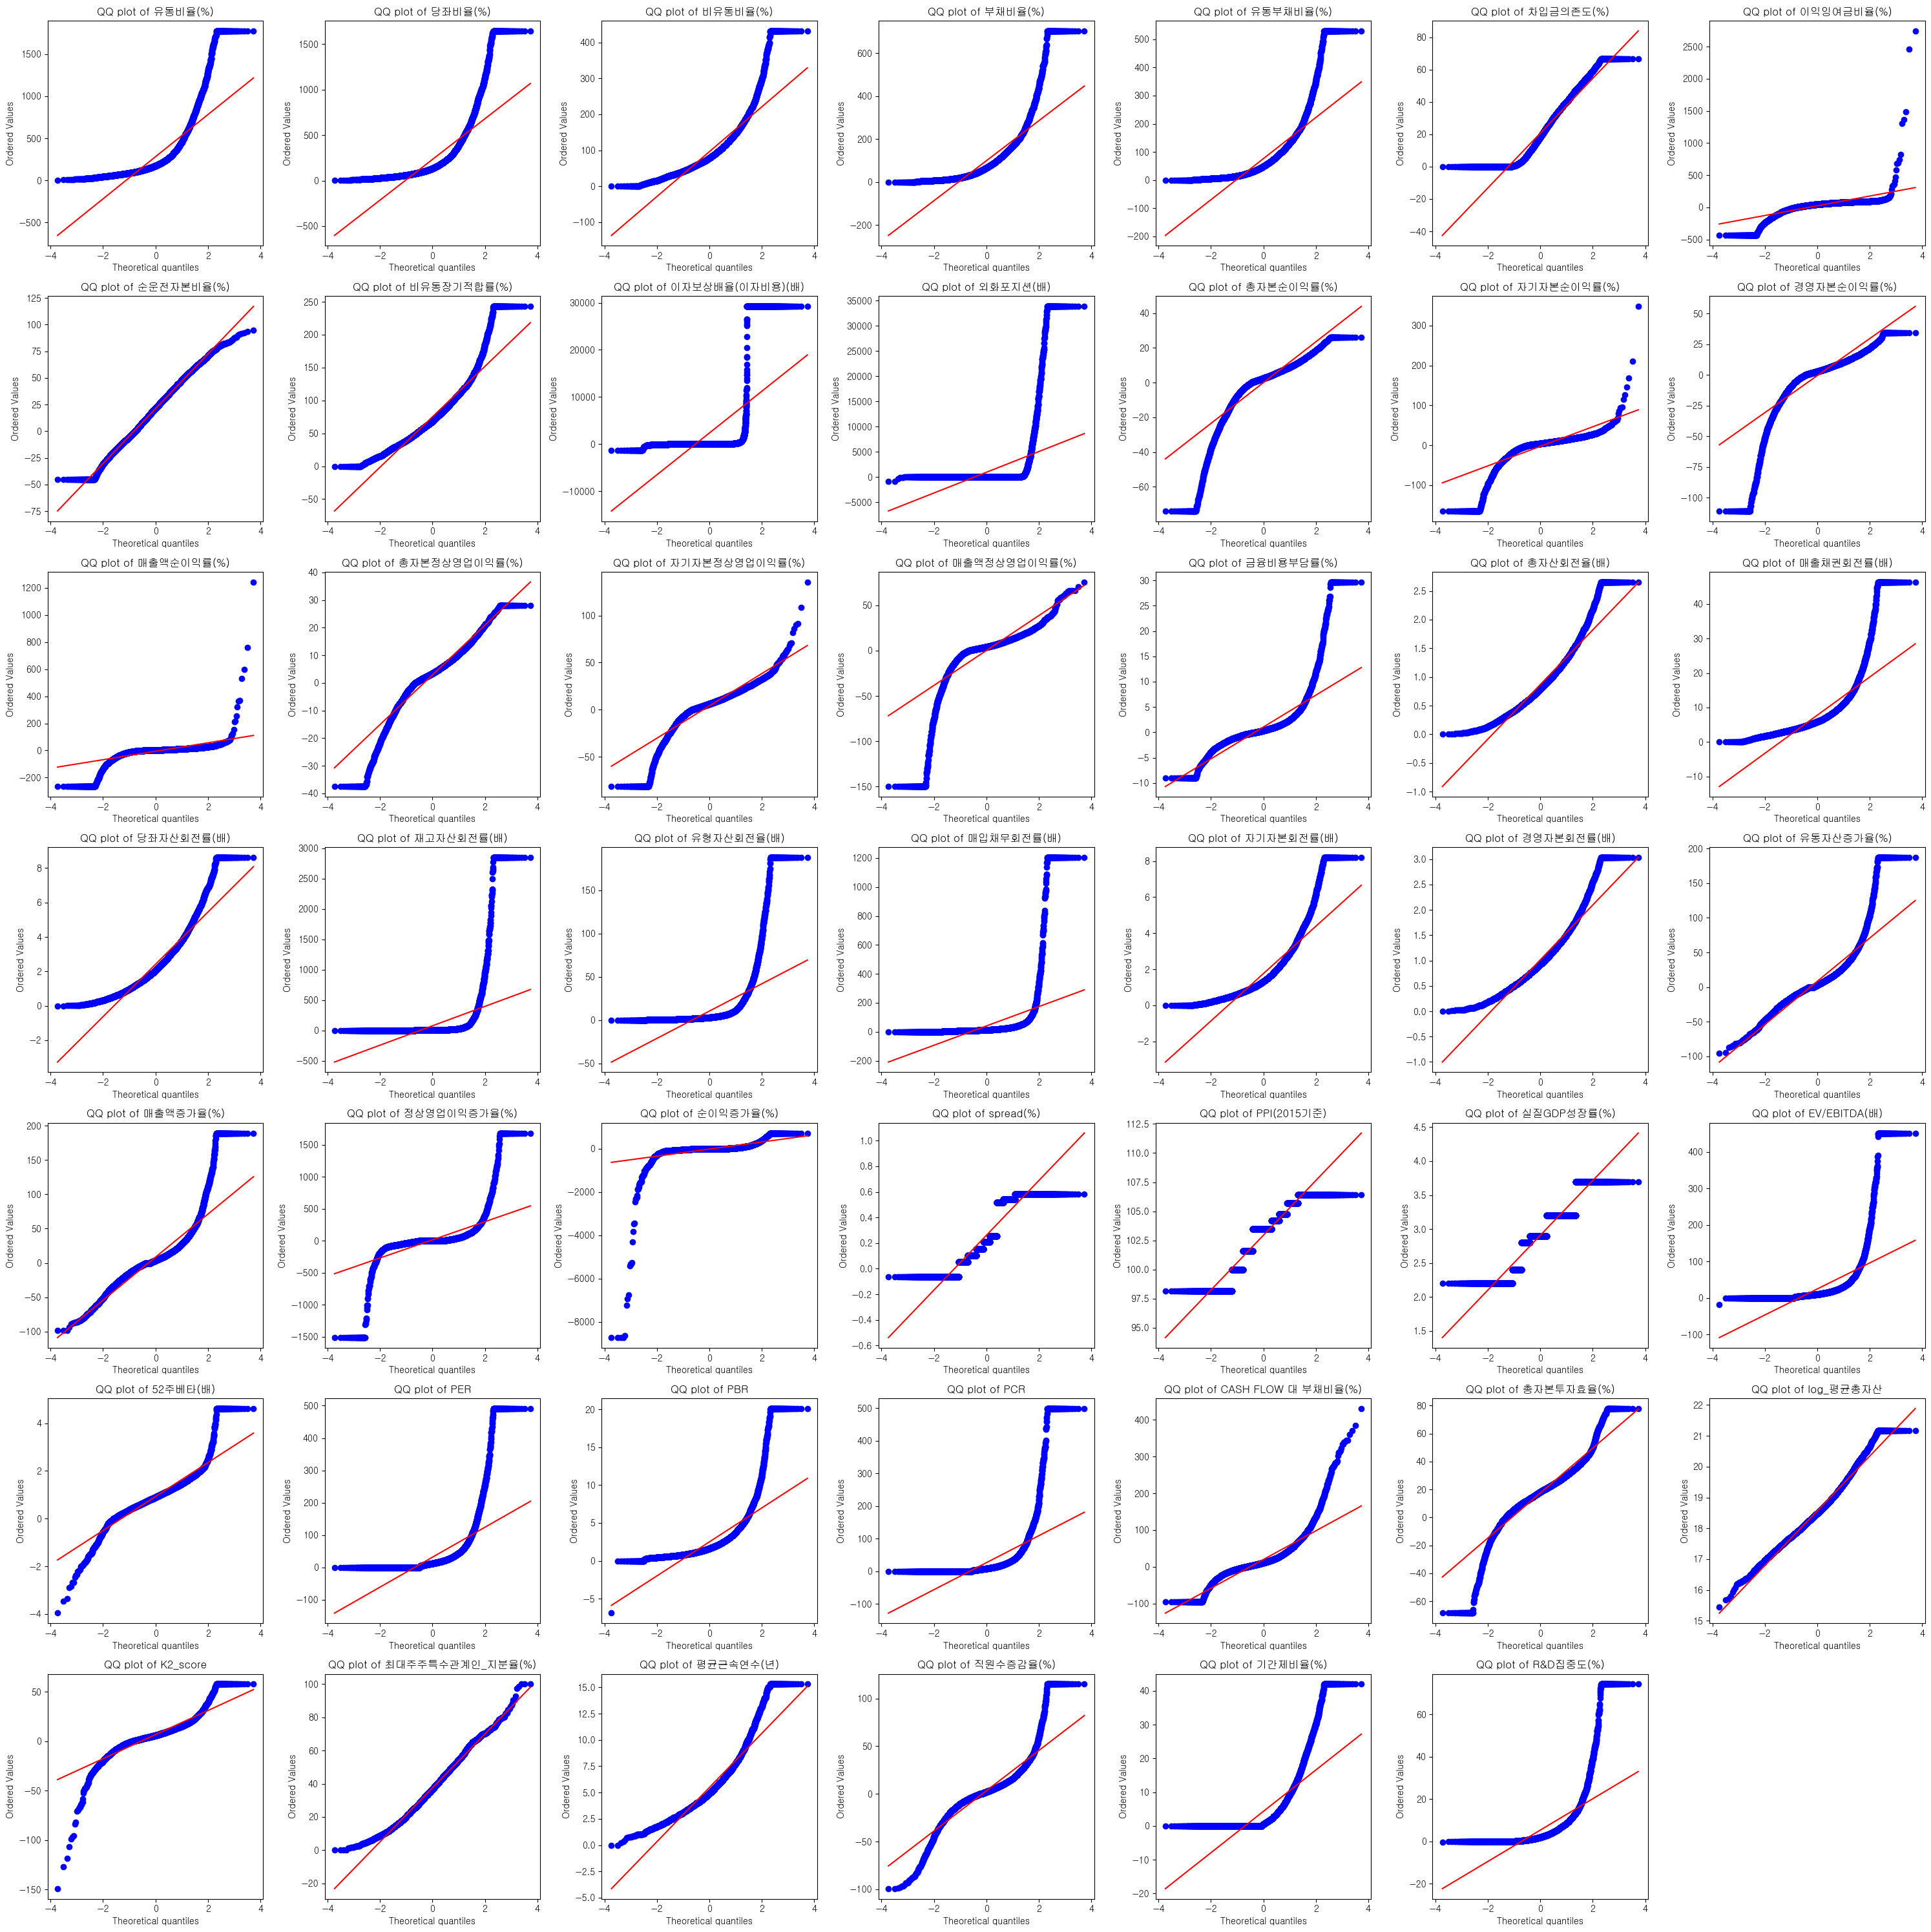

In [218]:
draw_qq(box_q_df_copy)

---

### 컬럼별 인코딩 & 비닝 방식 

In [219]:
# main_df['최대주주변경횟수(회)'].describe(percentiles=[0.01, 0.05, 0.1, 0.2, 0.3, .4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])
# main_df.loc[main_df['최대주주변경횟수(회)'] == 2]

for i in main_df['최대주주변경횟수(회)'].unique() :
    print(f'{i}회')
    print(np.round((main_df['최대주주변경횟수(회)'] == i).sum()*100/10900,4)) 
    print('\n')

0회
16.5872


1회
16.5138


2회
17.9174


3회
15.2936


4회
11.8532


5회
8.9174


6회
5.9174


7회
3.578


8회
1.9817


9회
0.9541


10회
0.422


11회
0.0642




In [220]:
# main_df['감사법인변경횟수(회)'].describe(percentiles=[0.01, 0.05, 0.1, 0.2, 0.3, .4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])
# main_df.loc[main_df['감사법인변경횟수(회)'] == 2]

for i in main_df['감사법인변경횟수(회)'].unique() :
    print(f'{i}회')
    print(np.round((main_df['감사법인변경횟수(회)'] == i).sum()*100/10900,4)) 
    print('\n')

0회
40.0092


1회
26.3853


2회
16.5872


3회
10.1651


4회
4.5138


5회
1.578


6회
0.5138


7회
0.211


8회
0.0367




10년
4.6422


11년
5.2569


12년
4.8991


13년
4.5505


14년
4.578


15년
4.3853


16년
4.2661


17년
4.0275


18년
3.7523


19년
3.5046


20년
3.1009


21년
2.367


9년
4.3211


6년
4.5596


7년
4.2202


8년
3.9725


0년
0.8349


1년
5.2569


2년
5.1927


3년
5.2018


4년
5.0367


5년
4.8532


22년
1.8624


29년
0.2202


24년
1.0367


25년
1.0092


23년
1.1651


26년
0.7064


27년
0.5872


28년
0.4312


30년
0.1101


31년
0.0459


32년
0.0367


33년
0.0092




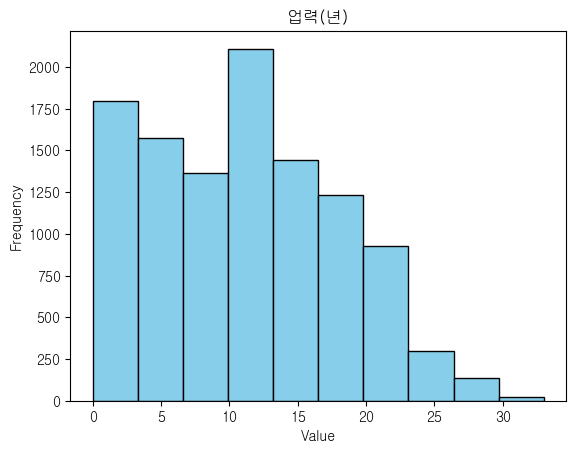

In [221]:
for i in main_df['업력(년)'].unique() :
    print(f'{i}년')
    print(np.round((main_df['업력(년)'] == i).sum()*100/10900,4)) 
    print('\n')

# 히스토그램 그리기
plt.hist(main_df['업력(년)'], bins=10, color='skyblue', edgecolor='black')

# 그래프 제목과 레이블 설정
plt.title('업력(년)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 그래프 보여주기
plt.show()

In [222]:
# 산업위험_경기민감도
main_df.loc[:, main_df.columns.str.contains('산업')].value_counts()

# 비율
# AA  : 14.34 %
# A   : 25.6 %
# B   : 21.94 %
# BB  : 19.95 %
# BBB : 18.15 % 



산업위험_경기민감도
A             2792
B             2392
BB            2175
BBB           1978
AA            1563
dtype: int64

In [223]:
main_df['최대주주특수관계인_지분율(%)'].describe(percentiles=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])

count    10900.000000
mean        37.239815
std         16.265250
min          0.000000
1%           5.999900
5%          11.978500
10%         16.279000
20%         22.636000
30%         27.657000
50%         36.140000
60%         40.710000
70%         45.643000
80%         51.062000
90%         59.761000
95%         66.270500
99%         74.160000
max        100.000000
Name: 최대주주특수관계인_지분율(%), dtype: float64

In [224]:
main_df['기간제비율(%)'].describe(percentiles=[0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.995])
# main_df.loc[main_df['기간제비율(%)'] == 100]

count    10900.000000
mean         4.533583
std          8.692064
min          0.000000
1%           0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
50%          0.760000
60%          1.990000
70%          3.913000
80%          7.312000
90%         13.510000
95%         21.585500
99%         41.311700
99.5%       51.791800
max        100.000000
Name: 기간제비율(%), dtype: float64

In [225]:
main_df['log_평균총자산'].describe(percentiles=[.005,0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.995])

# # 히스토그램 그리기
# plt.hist(main_df['log_평균총자산'], bins=10, color='skyblue', edgecolor='black')

# # 그래프 제목과 레이블 설정
# plt.title('log_평균총자산')
# plt.xlabel('Value')
# plt.ylabel('Frequency')

# # 그래프 보여주기
# plt.show()

count    10900.000000
mean        18.643019
std          0.943472
min         15.440264
0.5%        16.486541
1%          16.724138
5%          17.280523
10%         17.567563
20%         17.881039
30%         18.124983
50%         18.546595
60%         18.759305
70%         19.014802
80%         19.348636
90%         19.884367
95%         20.337149
99%         21.312526
99.5%       21.828566
max         24.603555
Name: log_평균총자산, dtype: float64

In [226]:
box_q_df['이자보상배율(이자비용)(배)'].describe(percentiles=[.005,0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.995])

count    7.371000e+03
mean     5.996994e+05
std      2.165820e+06
min     -3.891370e+06
0.5%    -1.343959e+03
1%      -2.081190e+02
5%      -1.611000e+01
10%     -5.860000e+00
20%     -1.260000e+00
30%      9.100000e-01
50%      4.650000e+00
60%      9.730000e+00
70%      2.307000e+01
80%      7.865000e+01
90%      1.221040e+03
95%      8.432098e+06
99%      8.432098e+06
99.5%    8.432098e+06
max      8.432098e+06
Name: 이자보상배율(이자비용)(배), dtype: float64

---

In [227]:
df_zino = box_q_df_copy.copy()

# ZiNo

In [228]:
# df_train 에 winsorizing 완료된  box_q_df_copy로 update
df_train.loc[:,['유동비율(%)', '당좌비율(%)', '비유동비율(%)', '부채비율(%)',
       '유동부채비율(%)', '차입금의존도(%)', '이익잉여금비율(%)', '순운전자본비율(%)', '비유동장기적합률(%)',
       '이자보상배율(이자비용)(배)', '외화포지션(배)', '총자본순이익률(%)', '자기자본순이익률(%)',
       '경영자본순이익률(%)', '매출액순이익률(%)', '총자본정상영업이익률(%)', '자기자본정상영업이익률(%)',
       '매출액정상영업이익률(%)', '금융비용부담률(%)', '총자산회전율(배)', '매출채권회전률(배)', '당좌자산회전률(배)',
       '재고자산회전률(배)', '유형자산회전율(배)', '매입채무회전률(배)', '자기자본회전률(배)', '경영자본회전률(배)',
       '유동자산증가율(%)', '매출액증가율(%)', '정상영업이익증가율(%)', '순이익증가율(%)', 'spread(%)',
       'PPI(2015기준)', '실질GDP성장률(%)', 'EV/EBITDA(배)', '52주베타(배)', 'PER', 'PBR',
       'PCR', 'CASH FLOW 대 부채비율(%)', '총자본투자효율(%)', 'log_평균총자산',
       'K2_score', '최대주주특수관계인_지분율(%)',
       '평균근속연수(년)', '직원수증감율(%)',
       '기간제비율(%)', 'R&D집중도(%)']] = df_zino


In [234]:
# df_train_copy = df_train.copy()
# df_test_copy = df_test.copy()
# df_train = df_train_copy.copy()
# df_test = df_test_copy.copy()

In [320]:
zino_train = df_train.drop(['K2_부실판단', '산업위험_경기민감도', '수출기업여부(dummy)', '주거래은행'], axis=1)
zino_test =  df_test.drop(['K2_부실판단', '산업위험_경기민감도', '수출기업여부(dummy)', '주거래은행'], axis=1)

In [321]:
zino_train['Target'].isna().sum()

0

## 1. Scailing

In [322]:
zino_train = zino_train.iloc[:, 3:]
zino_test = zino_test.iloc[:, 3:]

In [323]:
# 학습 세트와 테스트 세트로 분리
X_train = zino_train.drop('Target', axis=1)
X_test = zino_test.drop('Target', axis=1)
y_train = zino_train['Target'].reset_index(drop=True)
y_test = zino_test['Target'].reset_index(drop=True)

# StandardScaler 객체 생성
scaler = StandardScaler()
# 학습 세트를 사용하여 스케일링
X_train_scaled = scaler.fit_transform(X_train)
# 테스트 세트에도 동일한 스케일링 적용
X_test_scaled = scaler.transform(X_test)

zino_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
zino_train_scaled['Target'] = y_train
zino_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
zino_test_scaled['Target'] = y_test

print("Scaled Train Set:")
print(zino_train_scaled.isna().sum())
print("\nScaled Test Set:")
print(zino_test_scaled.isna().sum())


Scaled Train Set:
유동비율(%)                0
당좌비율(%)                0
비유동비율(%)               0
부채비율(%)                0
유동부채비율(%)              0
차입금의존도(%)              0
이익잉여금비율(%)             0
순운전자본비율(%)             0
비유동장기적합률(%)            0
이자보상배율(이자비용)(배)        0
외화포지션(배)               0
총자본순이익률(%)             0
자기자본순이익률(%)            0
경영자본순이익률(%)            0
매출액순이익률(%)             0
총자본정상영업이익률(%)          0
자기자본정상영업이익률(%)         0
매출액정상영업이익률(%)          0
금융비용부담률(%)             0
총자산회전율(배)              0
매출채권회전률(배)             0
당좌자산회전률(배)             0
재고자산회전률(배)             0
유형자산회전율(배)             0
매입채무회전률(배)             0
자기자본회전률(배)             0
경영자본회전률(배)             0
유동자산증가율(%)             0
매출액증가율(%)              0
정상영업이익증가율(%)           0
순이익증가율(%)              0
spread(%)              0
PPI(2015기준)            0
실질GDP성장률(%)            0
EV/EBITDA(배)           0
52주베타(배)               0
PER                    0
PBR                    0
PCR                    0
CASH FL

In [324]:
zino_train_scaled['산업위험_경기민감도'] = df_train['산업위험_경기민감도'].reset_index(drop=True)
zino_train_scaled['주거래은행'] = df_train['주거래은행'].reset_index(drop=True)
zino_train_scaled['수출기업여부(dummy)'] = df_train['수출기업여부(dummy)'].reset_index(drop=True)

zino_test_scaled['산업위험_경기민감도'] = df_test['산업위험_경기민감도'].reset_index(drop=True)
zino_test_scaled['주거래은행'] = df_test['주거래은행'].reset_index(drop=True)
zino_test_scaled['수출기업여부(dummy)'] = df_test['수출기업여부(dummy)'].reset_index(drop=True)

In [337]:
zino_all_scaled = pd.concat([zino_train_scaled,zino_test_scaled], axis=0)
zino_all_scaled = pd.get_dummies(zino_all_scaled, columns=['산업위험_경기민감도', '주거래은행'])

zino_train_scaled = zino_all_scaled.iloc[:7371, :]
zino_test_scaled = zino_all_scaled.iloc[7371:, :]


In [348]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report



X_train = zino_train_scaled.drop('Target', axis=1)
X_test = zino_test_scaled.drop('Target', axis=1)
y_train = zino_train_scaled['Target']
y_test = zino_test_scaled['Target']

model = TabNetClassifier(n_steps = 8, verbose=1) 

model.fit(X_train.values, y_train.values,
        eval_set=[(X_test.values, y_test.values)],
        eval_name=['test'],
        max_epochs=1000,
        patience= 50
        
    )

y_pred = model.predict(X_test.values)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(accuracy)
print(f'f1 score(macro)  :  {np.round(f1,4)}')

print(classification_report(y_test, y_pred))

c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.11916 | test_auc: 0.46235 |  0:00:03s
epoch 1  | loss: 0.53531 | test_auc: 0.48191 |  0:00:05s
epoch 2  | loss: 0.37685 | test_auc: 0.61239 |  0:00:08s
epoch 3  | loss: 0.32561 | test_auc: 0.67912 |  0:00:11s
epoch 4  | loss: 0.28552 | test_auc: 0.76152 |  0:00:14s
epoch 5  | loss: 0.25128 | test_auc: 0.77211 |  0:00:17s
epoch 6  | loss: 0.23624 | test_auc: 0.78054 |  0:00:19s
epoch 7  | loss: 0.23691 | test_auc: 0.77399 |  0:00:22s
epoch 8  | loss: 0.23999 | test_auc: 0.76228 |  0:00:25s
epoch 9  | loss: 0.22836 | test_auc: 0.78523 |  0:00:27s
epoch 10 | loss: 0.21337 | test_auc: 0.79758 |  0:00:30s
epoch 11 | loss: 0.21165 | test_auc: 0.7964  |  0:00:33s
epoch 12 | loss: 0.20894 | test_auc: 0.80654 |  0:00:36s
epoch 13 | loss: 0.2067  | test_auc: 0.81733 |  0:00:39s
epoch 14 | loss: 0.2032  | test_auc: 0.79568 |  0:00:42s
epoch 15 | loss: 0.21505 | test_auc: 0.81023 |  0:00:45s
epoch 16 | loss: 0.20296 | test_auc: 0.8084  |  0:00:48s
epoch 17 | loss: 0.20096 | test

c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


0.916075985256592
f1 score(macro)  :  0.6666
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3283
           1       0.39      0.37      0.38       244

    accuracy                           0.92      3527
   macro avg       0.67      0.66      0.67      3527
weighted avg       0.91      0.92      0.92      3527



In [349]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report



X_train = zino_train_scaled.drop('Target', axis=1)
X_test = zino_test_scaled.drop('Target', axis=1)
y_train = zino_train_scaled['Target']
y_test = zino_test_scaled['Target']

model = TabNetClassifier(n_steps = 7, verbose=1) 

model.fit(X_train.values, y_train.values,
        eval_set=[(X_test.values, y_test.values)],
        eval_name=['test'],
        max_epochs=1000,
        patience= 50
        
    )

y_pred = model.predict(X_test.values)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(accuracy)
print(f'f1 score(macro)  :  {np.round(f1,4)}')

print(classification_report(y_test, y_pred))

c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.61825 | test_auc: 0.41168 |  0:00:02s
epoch 1  | loss: 0.45196 | test_auc: 0.51612 |  0:00:04s
epoch 2  | loss: 0.37192 | test_auc: 0.59754 |  0:00:07s
epoch 3  | loss: 0.32002 | test_auc: 0.64547 |  0:00:09s
epoch 4  | loss: 0.28198 | test_auc: 0.70456 |  0:00:12s
epoch 5  | loss: 0.2574  | test_auc: 0.73918 |  0:00:14s
epoch 6  | loss: 0.2439  | test_auc: 0.76316 |  0:00:16s
epoch 7  | loss: 0.2332  | test_auc: 0.77699 |  0:00:19s
epoch 8  | loss: 0.2327  | test_auc: 0.78517 |  0:00:21s
epoch 9  | loss: 0.21518 | test_auc: 0.78187 |  0:00:24s
epoch 10 | loss: 0.21698 | test_auc: 0.7954  |  0:00:26s
epoch 11 | loss: 0.21002 | test_auc: 0.78093 |  0:00:29s
epoch 12 | loss: 0.21516 | test_auc: 0.79505 |  0:00:31s
epoch 13 | loss: 0.20582 | test_auc: 0.78606 |  0:00:33s
epoch 14 | loss: 0.19992 | test_auc: 0.79856 |  0:00:36s
epoch 15 | loss: 0.19694 | test_auc: 0.79944 |  0:00:38s
epoch 16 | loss: 0.20651 | test_auc: 0.80411 |  0:00:41s
epoch 17 | loss: 0.2059  | test

c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


0.9291182307910405
f1 score(macro)  :  0.6671
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3283
           1       0.48      0.30      0.37       244

    accuracy                           0.93      3527
   macro avg       0.72      0.64      0.67      3527
weighted avg       0.92      0.93      0.92      3527



In [350]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report



X_train = zino_train_scaled.drop('Target', axis=1)
X_test = zino_test_scaled.drop('Target', axis=1)
y_train = zino_train_scaled['Target']
y_test = zino_test_scaled['Target']

model = TabNetClassifier(n_steps = 5, verbose=1) 

model.fit(X_train.values, y_train.values,
        eval_set=[(X_test.values, y_test.values)],
        eval_name=['test'],
        max_epochs=1000,
        patience= 100
        
    )

y_pred = model.predict(X_test.values)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(accuracy)
print(f'f1 score(macro)  :  {np.round(f1,4)}')

print(classification_report(y_test, y_pred))

c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.55041 | test_auc: 0.50222 |  0:00:02s
epoch 1  | loss: 0.42365 | test_auc: 0.60013 |  0:00:04s
epoch 2  | loss: 0.33966 | test_auc: 0.67637 |  0:00:06s
epoch 3  | loss: 0.27644 | test_auc: 0.71861 |  0:00:08s
epoch 4  | loss: 0.27391 | test_auc: 0.78418 |  0:00:10s
epoch 5  | loss: 0.24798 | test_auc: 0.81231 |  0:00:11s
epoch 6  | loss: 0.22819 | test_auc: 0.80815 |  0:00:13s
epoch 7  | loss: 0.21919 | test_auc: 0.80695 |  0:00:15s
epoch 8  | loss: 0.21767 | test_auc: 0.79554 |  0:00:17s
epoch 9  | loss: 0.20628 | test_auc: 0.80769 |  0:00:19s
epoch 10 | loss: 0.20831 | test_auc: 0.81878 |  0:00:21s
epoch 11 | loss: 0.19913 | test_auc: 0.82888 |  0:00:23s
epoch 12 | loss: 0.20188 | test_auc: 0.84147 |  0:00:25s
epoch 13 | loss: 0.20194 | test_auc: 0.83905 |  0:00:27s
epoch 14 | loss: 0.19436 | test_auc: 0.84306 |  0:00:29s
epoch 15 | loss: 0.20165 | test_auc: 0.82042 |  0:00:31s
epoch 16 | loss: 0.19418 | test_auc: 0.82486 |  0:00:33s
epoch 17 | loss: 0.2001  | test

c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


0.919478310178622
f1 score(macro)  :  0.6629
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3283
           1       0.40      0.34      0.37       244

    accuracy                           0.92      3527
   macro avg       0.68      0.65      0.66      3527
weighted avg       0.91      0.92      0.92      3527



In [351]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report



X_train = zino_train_scaled.drop('Target', axis=1)
X_test = zino_test_scaled.drop('Target', axis=1)
y_train = zino_train_scaled['Target']
y_test = zino_test_scaled['Target']

model = TabNetClassifier(n_steps = 4, verbose=1) 

model.fit(X_train.values, y_train.values,
        eval_set=[(X_test.values, y_test.values)],
        eval_name=['test'],
        max_epochs=1000,
        patience= 100
        
    )

y_pred = model.predict(X_test.values)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(accuracy)
print(f'f1 score(macro)  :  {np.round(f1,4)}')

print(classification_report(y_test, y_pred))

c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.52461 | test_auc: 0.53398 |  0:00:02s
epoch 1  | loss: 0.35708 | test_auc: 0.64958 |  0:00:03s
epoch 2  | loss: 0.31769 | test_auc: 0.69436 |  0:00:05s
epoch 3  | loss: 0.28297 | test_auc: 0.72092 |  0:00:06s
epoch 4  | loss: 0.25462 | test_auc: 0.71827 |  0:00:08s
epoch 5  | loss: 0.24723 | test_auc: 0.72143 |  0:00:10s
epoch 6  | loss: 0.23038 | test_auc: 0.75752 |  0:00:12s
epoch 7  | loss: 0.22341 | test_auc: 0.77176 |  0:00:13s
epoch 8  | loss: 0.22198 | test_auc: 0.78687 |  0:00:15s
epoch 9  | loss: 0.21176 | test_auc: 0.7759  |  0:00:16s
epoch 10 | loss: 0.20914 | test_auc: 0.77402 |  0:00:18s
epoch 11 | loss: 0.20792 | test_auc: 0.78596 |  0:00:19s
epoch 12 | loss: 0.21127 | test_auc: 0.79021 |  0:00:21s
epoch 13 | loss: 0.20099 | test_auc: 0.76914 |  0:00:22s
epoch 14 | loss: 0.19716 | test_auc: 0.75758 |  0:00:24s
epoch 15 | loss: 0.20082 | test_auc: 0.75524 |  0:00:26s
epoch 16 | loss: 0.19591 | test_auc: 0.78361 |  0:00:27s
epoch 17 | loss: 0.19886 | test

c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


0.9225971080238162
f1 score(macro)  :  0.6357
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3283
           1       0.41      0.25      0.31       244

    accuracy                           0.92      3527
   macro avg       0.68      0.61      0.64      3527
weighted avg       0.91      0.92      0.91      3527



In [352]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report



X_train = zino_train_scaled.drop('Target', axis=1)
X_test = zino_test_scaled.drop('Target', axis=1)
y_train = zino_train_scaled['Target']
y_test = zino_test_scaled['Target']

model = TabNetClassifier(n_steps = 3, verbose=1) 

model.fit(X_train.values, y_train.values,
        eval_set=[(X_test.values, y_test.values)],
        eval_name=['test'],
        max_epochs=1000,
        patience= 100
        
    )

y_pred = model.predict(X_test.values)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(accuracy)
print(f'f1 score(macro)  :  {np.round(f1,4)}')

print(classification_report(y_test, y_pred))

c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.38188 | test_auc: 0.55365 |  0:00:02s
epoch 1  | loss: 0.46985 | test_auc: 0.57211 |  0:00:03s
epoch 2  | loss: 0.30549 | test_auc: 0.7397  |  0:00:04s
epoch 3  | loss: 0.23736 | test_auc: 0.78601 |  0:00:05s
epoch 4  | loss: 0.22207 | test_auc: 0.78827 |  0:00:07s
epoch 5  | loss: 0.20748 | test_auc: 0.79629 |  0:00:09s
epoch 6  | loss: 0.20389 | test_auc: 0.80096 |  0:00:10s
epoch 7  | loss: 0.20376 | test_auc: 0.80853 |  0:00:11s
epoch 8  | loss: 0.19866 | test_auc: 0.82133 |  0:00:13s
epoch 9  | loss: 0.19745 | test_auc: 0.81954 |  0:00:14s
epoch 10 | loss: 0.19383 | test_auc: 0.81603 |  0:00:15s
epoch 11 | loss: 0.19186 | test_auc: 0.8207  |  0:00:17s
epoch 12 | loss: 0.18626 | test_auc: 0.82343 |  0:00:18s
epoch 13 | loss: 0.19051 | test_auc: 0.82867 |  0:00:20s
epoch 14 | loss: 0.19512 | test_auc: 0.82074 |  0:00:21s
epoch 15 | loss: 0.19092 | test_auc: 0.82056 |  0:00:22s
epoch 16 | loss: 0.19094 | test_auc: 0.827   |  0:00:24s
epoch 17 | loss: 0.18998 | test

c:\Users\zino0\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


0.9234476892543237
f1 score(macro)  :  0.7105
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3283
           1       0.45      0.48      0.46       244

    accuracy                           0.92      3527
   macro avg       0.71      0.72      0.71      3527
weighted avg       0.93      0.92      0.92      3527



---

### 별도. 순운전자본비율 > 유동부채비율 :
    - Formula 상 위 대소관계는 비정상 
    - 자기자본 ==0 일때, inf가 아닌 0으로 처리되는 Case 가능성 有
    → 별도 처리 X  
    

In [520]:
main_df.loc[(main_df['순운전자본비율(%)'] < 0) & (main_df['유동부채비율(%)'] == 0)]

회사명   거래소코드  회계년도  유동비율(%)  당좌비율(%)  비유동비율(%)  부채비율(%)  \
96            (주)골드앤에스   35290  2019    18.57    16.21       0.0      0.0   
2025             (주)리드  197210  2019    44.29    42.88       0.0      0.0   
2364            (주)모린스  110310  2013     6.25     6.25       0.0      0.0   
2481         (주)미성포리테크   94700  2011    34.08    11.85       0.0      0.0   
2725            (주)베스파  299910  2021    76.42    76.42       0.0      0.0   
3164          (주)삼우이엠씨   26250  2012    32.83    32.40       0.0      0.0   
3888           (주)소리바다   53110  2021    64.08    63.45       0.0      0.0   
4173       (주)시너지이노베이션   48870  2015    22.73    20.83       0.0      0.0   
4954           (주)아이엠텍  226350  2020    47.37    44.32       0.0      0.0   
6318           (주)엔스퍼트   98400  2011    40.98    17.95       0.0      0.0   
6855         (주)오리엔탈정공   14940  2012    87.24    61.03       0.0      0.0   
7154          (주)와이즈파워   40670  2014    41.59    40.07       0.0      0.0   
7258             (주)우전   52270  2016    20.08    16.59       0.0      0.0   
7845         (주)유아이에너지   50050  2011    54.63    54.63       0.0      0.0   
7853           (주)유에이블   71530  2012    77.26    77.25       0.0      0.0   
11646          (주)플렉스컴   65270  2015    48.46    15.00       0.0      0.0   
11735          (주)피엘에이   82390  2015    19.20    19.12       0.0      0.0   
12432           (주)휴먼엔   32860  2014    36.07    23.22       0.0      0.0   
12955         뉴지랩파마(주)  214870  2022    44.15    38.57       0.0      0.0   
13144        대한그린파워(주)   60900  2014     4.79     4.63       0.0      0.0   
13702           미리넷(주)   56710  2011    42.50    40.22       0.0      0.0   
14396          쌍용건설(주)   12650  2012    67.08    57.80       0.0      0.0   
14455         씨앤티85(주)   56730  2019    23.21    22.97       0.0      0.0   
14953  에스지에이클라우드서비스(주)  224880  2019    45.52    44.71       0.0      0.0   
14954  에스지에이클라우드서비스(주)  224880  2020    30.46    30.26       0.0      0.0   
15296           엘컴텍(주)   37950  2012    27.19    12.61       0.0      0.0   
15421        오성첨단소재(주)   52420  2013    21.02    14.89       0.0      0.0   
16347         지나인제약(주)   78650  2021    51.43    42.73       0.0      0.0   
16348         지나인제약(주)   78650  2022     7.12     7.12       0.0      0.0   
16459         참존글로벌(주)  158310  2020    12.24    11.92       0.0      0.0   
16766         태산엘시디(주)   36210  2013    74.09    72.62       0.0      0.0   
17403          현진소재(주)   53660  2019    25.29    18.42       0.0      0.0   
17404          현진소재(주)   53660  2020    13.11    10.12       0.0      0.0   

       유동부채비율(%)  차입금의존도(%)    이익잉여금비율(%)  ...  최대주주변경횟수(회)  감사법인변경횟수(회)  \
96           0.0     112.14   -955.721895  ...            7            5   
2025         0.0     129.36  -2229.702481  ...            2            6   
2364         0.0      76.63   -432.409974  ...            0            0   
2481         0.0      75.62    745.485525  ...            0            0   
2725         0.0      50.02   -251.352023  ...            2            1   
3164         0.0     105.53 -52909.880264  ...            1            1   
3888         0.0      56.18   7832.324510  ...            6            4   
4173         0.0     172.73  -1250.604358  ...            1            0   
4954         0.0      89.18  -1801.031265  ...            2            6   
6318         0.0      69.31    585.509160  ...            0            0   
6855         0.0      89.96    408.072547  ...            1            0   
7154         0.0     169.72   1367.768853  ...            3            1   
7258         0.0     141.34    344.888299  ...            4            1   
7845         0.0      30.00    824.868560  ...            0            0   
7853         0.0      70.92 -20076.106163  ...            1            0   
11646        0.0      71.12    -49.969099  ...            3            1   
11735        0.0      76.58  -1495.816563  ...            0            2   
12432        0.0      79.44   -6

In [521]:
df_train.loc[df_train['이자보상배율(이자비용)(배)'] ==df_train['이자보상배율(이자비용)(배)'].max()][['회사명', '거래소코드', '회계년도', '이자보상배율(이자비용)(배)', 'Target']]
# df_train[['이자보상배율(이자비용)(배)']].describe(percentiles = [.05, .25, .5, .75, .95])

회사명   거래소코드  회계년도  이자보상배율(이자비용)(배)  Target
5       (주)CMG제약   58820  2016       8432098.32       0
6       (주)CMG제약   58820  2017       8432098.32       0
7       (주)CMG제약   58820  2018       8432098.32       0
275    (주)금화피에스시   36190  2011       8432098.32       0
276    (주)금화피에스시   36190  2012       8432098.32       0
...          ...     ...   ...              ...     ...
17321    해성산업(주)   34810  2017       8432098.32       0
17370  현대에이치티(주)   39010  2018       8432098.32       0
17371  현대에이치티(주)   39010  2019       8432098.32       0
17435  휴림네트웍스(주)  192410  2016       8432098.32       1
17468      휴젤(주)  145020  2016       8432098.32       0

[523 rows x 5 columns]

In [522]:
# 이자보상배율()

## III-. K2_score

## III-. R&D집중도

## III-. 평균근속연수